In [1]:
# Importing data processing and Linear Algebra libraries 
import pandas as pd 
import numpy as np

# Importing data visualization libraries 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [6]:
# gender==Male=>gender.value==1 else gender.value==0
df['gender'] = (df['gender'] == 'Male').astype(int)

In [7]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046       1  67.0             0              1          Yes   
1  51676       0  61.0             0              0          Yes   
2  31112       1  80.0             0              1          Yes   
3  60182       0  49.0             0              0          Yes   
4   1665       0  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [8]:
# ever_married==Yes=>ever_married.value==1 else ever_married.value==0
df['ever_married'] = (df['ever_married'] == 'Yes').astype(int)

In [9]:
df.head()

id  gender   age  hypertension  heart_disease  ever_married  \
0   9046       1  67.0             0              1             1   
1  51676       0  61.0             0              0             1   
2  31112       1  80.0             0              1             1   
3  60182       0  49.0             0              0             1   
4   1665       0  79.0             1              0             1   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [10]:
# Residence_type==Urban=>Residence_type.value==1 else if Residence_type == Rural => Residence_type.value==0
df['Residence_type'] = (df['Residence_type'] == 'Urban').astype(int)
df.head()

id  gender   age  hypertension  heart_disease  ever_married  \
0   9046       1  67.0             0              1             1   
1  51676       0  61.0             0              0             1   
2  31112       1  80.0             0              1             1   
3  60182       0  49.0             0              0             1   
4   1665       0  79.0             1              0             1   

       work_type  Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private               1             228.69  36.6  formerly smoked   
1  Self-employed               0             202.21   NaN     never smoked   
2        Private               0             105.92  32.5     never smoked   
3        Private               1             171.23  34.4           smokes   
4  Self-employed               0             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [11]:
#Search for Number of values in each Column
for i in list(df.columns):
    print("Number of Unique values in {} :  {} ".format(i,df[i].value_counts().shape[0]))

Number of Unique values in id :  5110 
Number of Unique values in gender :  2 
Number of Unique values in age :  104 
Number of Unique values in hypertension :  2 
Number of Unique values in heart_disease :  2 
Number of Unique values in ever_married :  2 
Number of Unique values in work_type :  5 
Number of Unique values in Residence_type :  2 
Number of Unique values in avg_glucose_level :  3979 
Number of Unique values in bmi :  418 
Number of Unique values in smoking_status :  4 
Number of Unique values in stroke :  2 


In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
df = pd.get_dummies(df, columns=['work_type'], dtype = int)
df = pd.get_dummies(df, columns=['smoking_status'], dtype = int)


KeyError: "None of [Index(['work_type'], dtype='object')] are in the [columns]"

In [17]:
df.head()

id  gender   age  hypertension  heart_disease  ever_married  \
0   9046       1  67.0             0              1             1   
1  51676       0  61.0             0              0             1   
2  31112       1  80.0             0              1             1   
3  60182       0  49.0             0              0             1   
4   1665       0  79.0             1              0             1   

   Residence_type  avg_glucose_level   bmi  stroke  work_type_Govt_job  \
0               1             228.69  36.6       1                   0   
1               0             202.21   NaN       1                   0   
2               0             105.92  32.5       1                   0   
3               1             171.23  34.4       1                   0   
4               0             174.12  24.0       1                   0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
1                       0                  0                        1   
2                       0                  1                        0   
3                       0                  1                        0   
4                       0                  0                        1   

   work_type_children  smoking_status_Unknown  smoking_status_formerly smoked  \
0                   0                       0                               1   
1                   0                       0                               0   
2                   0                       0                               0   
3                   0                       0                               0   
4                   0                       0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0

In [18]:
#checking if any value is Nill inside the data set : 
missing_data = df.isnull().sum()/ len(df) * 100
missing_data 

id                                0.000000
gender                            0.000000
age                               0.000000
hypertension                      0.000000
heart_disease                     0.000000
ever_married                      0.000000
Residence_type                    0.000000
avg_glucose_level                 0.000000
bmi                               3.933464
stroke                            0.000000
work_type_Govt_job                0.000000
work_type_Never_worked            0.000000
work_type_Private                 0.000000
work_type_Self-employed           0.000000
work_type_children                0.000000
smoking_status_Unknown            0.000000
smoking_status_formerly smoked    0.000000
smoking_status_never smoked       0.000000
smoking_status_smokes             0.000000
dtype: float64

In [19]:
#3,9% of the bmi values is missing in the data set => possible solutions ( imputations , dropping columns or rows )
# since BMI is a usefull Column for predicting the possiblity of a stroke , dropping the column or using imputations will affect the accuracy of the model hince why dropping 
# the rows is the best fit solution . 
bmi_notna_mask = pd.notna(df['bmi'])
df=df[bmi_notna_mask]
df.describe()
    

id       gender          age  hypertension  heart_disease  \
count   4909.000000  4909.000000  4909.000000   4909.000000    4909.000000   
mean   37064.313506     0.409656    42.865374      0.091872       0.049501   
std    20995.098457     0.491820    22.555115      0.288875       0.216934   
min       77.000000     0.000000     0.080000      0.000000       0.000000   
25%    18605.000000     0.000000    25.000000      0.000000       0.000000   
50%    37608.000000     0.000000    44.000000      0.000000       0.000000   
75%    55220.000000     1.000000    60.000000      0.000000       0.000000   
max    72940.000000     1.000000    82.000000      1.000000       1.000000   

       ever_married  Residence_type  avg_glucose_level          bmi  \
count   4909.000000     4909.000000        4909.000000  4909.000000   
mean       0.652679        0.507232         105.305150    28.893237   
std        0.476167        0.499999          44.424341     7.854067   
min        0.000000        0.000000          55.120000    10.300000   
25%        0.000000        0.000000          77.070000    23.500000   
50%        1.000000        1.000000          91.680000    28.100000   
75%        1.000000        1.000000         113.570000    33.100000   
max        1.000000        1.000000         271.740000    97.600000   

            stroke  work_type_Govt_job  work_type_Never_worked  \
count  4909.000000         4909.000000             4909.000000   
mean      0.042575            0.128336                0.004482   
std       0.201917            0.334497                0.066801   
min       0.000000            0.000000                0.000000   
25%       0.000000            0.000000                0.000000   
50%       0.000000            0.000000                0.000000   
75%       0.000000            0.000000                0.000000   
max       1.000000            1.000000                1.000000   

       work_type_Private  work_type_Self-employed  work_type_children  \
count        4909.000000              4909.000000         4909.000000   
mean            0.572622                 0.157873            0.136688   
std             0.494748                 0.364659            0.343552   
min             0.000000                 0.000000            0.000000   
25%             0.000000                 0.000000            0.000000   
50%             1.000000                 0.000000            0.000000   
75%             1.000000                 0.000000            0.000000   
max             1.000000                 1.000000            1.000000   

       smoking_status_Unknown  smoking_status_formerly smoked  \
count             4909.000000                     4909.000000   
mean                 0.302098                        0.170503   
std                  0.459214                        0.376113   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  1.000000                        0.000000   
max                  1.000000                        1.000000   

       smoking_status_never smoked  smoking_status_smokes  
count                  4909.000000            4909.000000  
mean                      0.377266               0.150132  
std                       0.484752               0.357238  
min                       0.000000               0.000000  
25%                       0.000000               0.000000  
50%                       0.000000               0.000000  
75%                       1.000000               0.000000  
max                       1.000000               1.000000

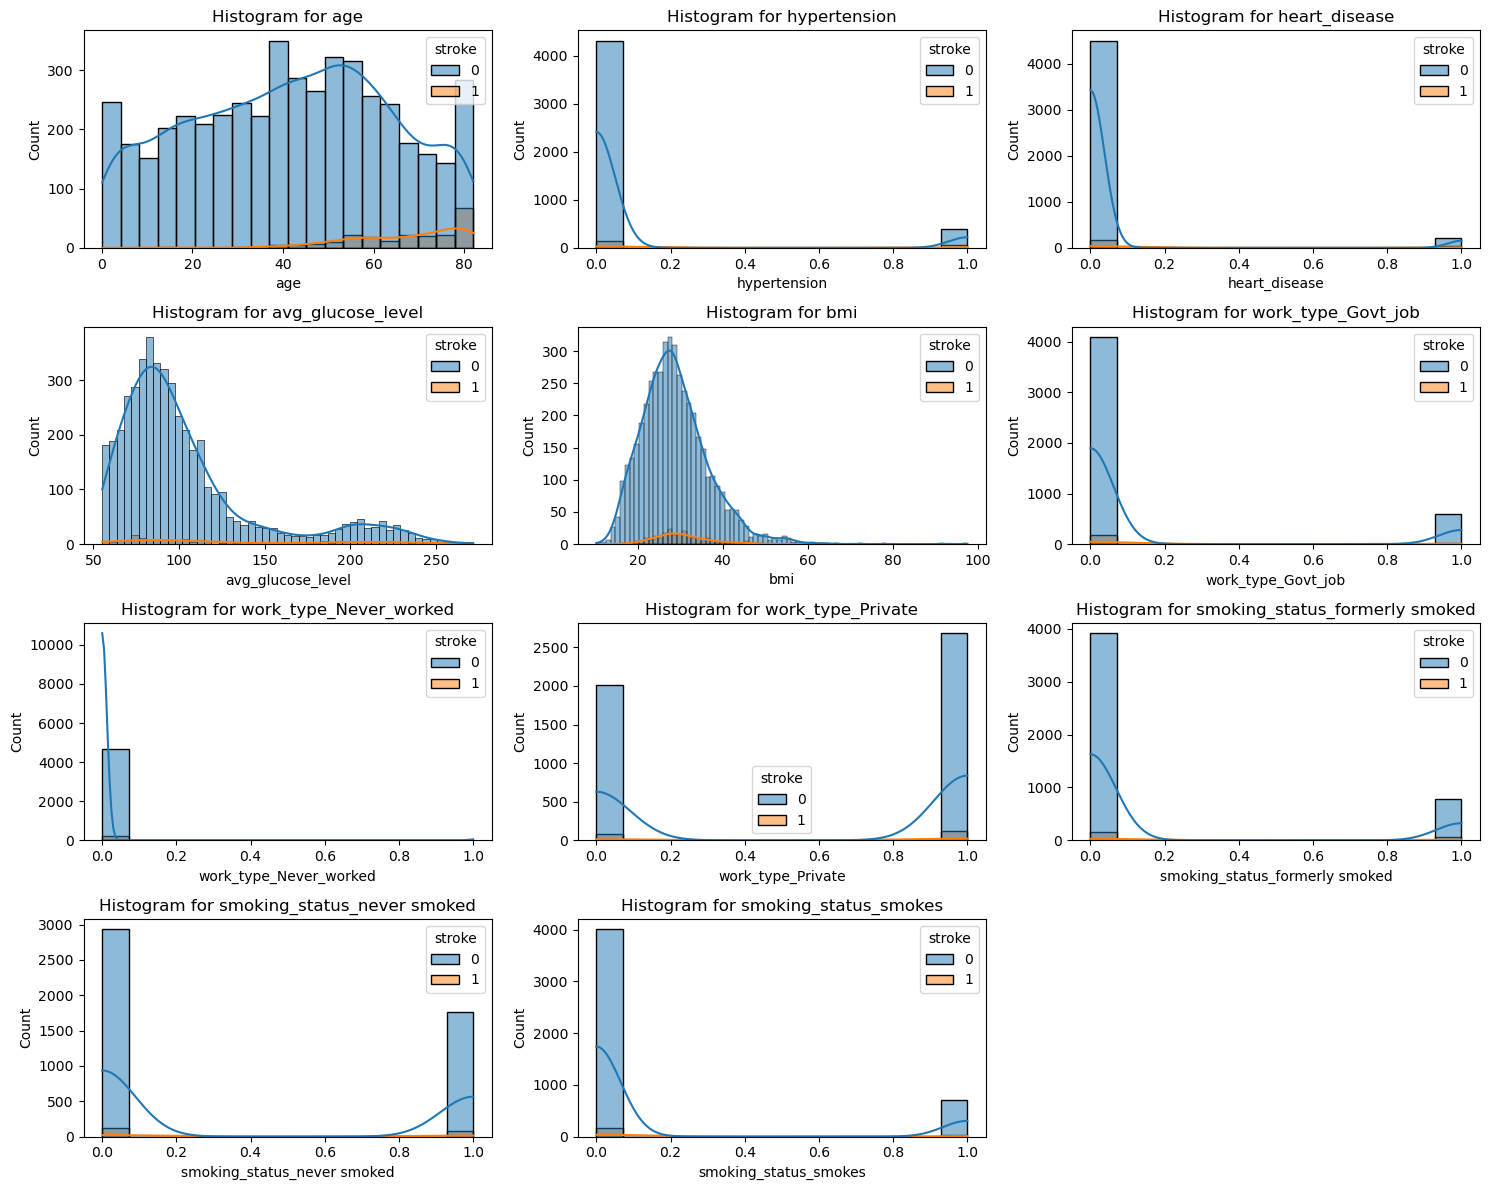

In [20]:
#Data visualisation 
import seaborn as sns 
columns_to_plot = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
                    'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
                    'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']

# Set the number of columns and rows for subplots
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

# Create subplots using Seaborn
plt.figure(figsize=(15, 12))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=column, hue='stroke', kde=True)
    plt.title(f'Histogram for {column}')

plt.tight_layout()
plt.show()

In [21]:
#Creating the Train/Test datasets 
from sklearn.model_selection import train_test_split
#Creating the Feature's and Class set
X = df.drop(columns = ['id','stroke'])
y = df['stroke']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

In [23]:
print(sum(y_train == 0))
print(sum(y_train == 1))

3751
176


In [24]:
#Data needs to be oversampled to avoid innacuracy problems when training the model, we also need to scale our data  . 
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

In [25]:
def scale_dataset(X_axis,y_axis, oversample=False):
    X = X_axis.values
    y = y_axis.values
    
    scaler = StandardScaler()
    
    X = scaler.fit_transform(X)
    
    if oversample  : 
        ros=RandomOverSampler()
        X,y = ros.fit_resample(X, y)
        
        
    
    data = np.hstack((X,np.reshape(y,(-1,1))))
    return data , X , y

In [26]:
train,X_train,y_train = scale_dataset(X_train,y_train,oversample=True)

In [27]:
print(sum(y_train == 0))
print(sum(y_train == 1))
print(train.shape[0])

3751
3751
7502


In [30]:
def plot_history(history): 
    fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,7))
    ax1.plot(history.history['loss'],label='loss')
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_xlabel=('Epoch')
    ax1.set_ylabel=('Binary crossentropy')
    ax1.legend()
    ax1.grid()
    ax2.plot(history.history['accuracy'],label='accuracy')
    ax2.plot(history.history['val_accuracy'],label='val_accuracy')
    ax2.set_xlabel=('Epoch')
    ax2.set_ylabel=('Accuracy')
    ax2.legend()
    ax2.grid()
    plt.show()

In [31]:
#DataSet is now Scaled and oversampled ==> ready to implement the algorithm
import tensorflow as tf 


In [32]:
len(df.columns)

19

In [33]:
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs) : 
    nn_model=tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(17,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes,activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1,activation='sigmoid')
        
    ])
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
    history = nn_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0)
    
    return nn_model,history

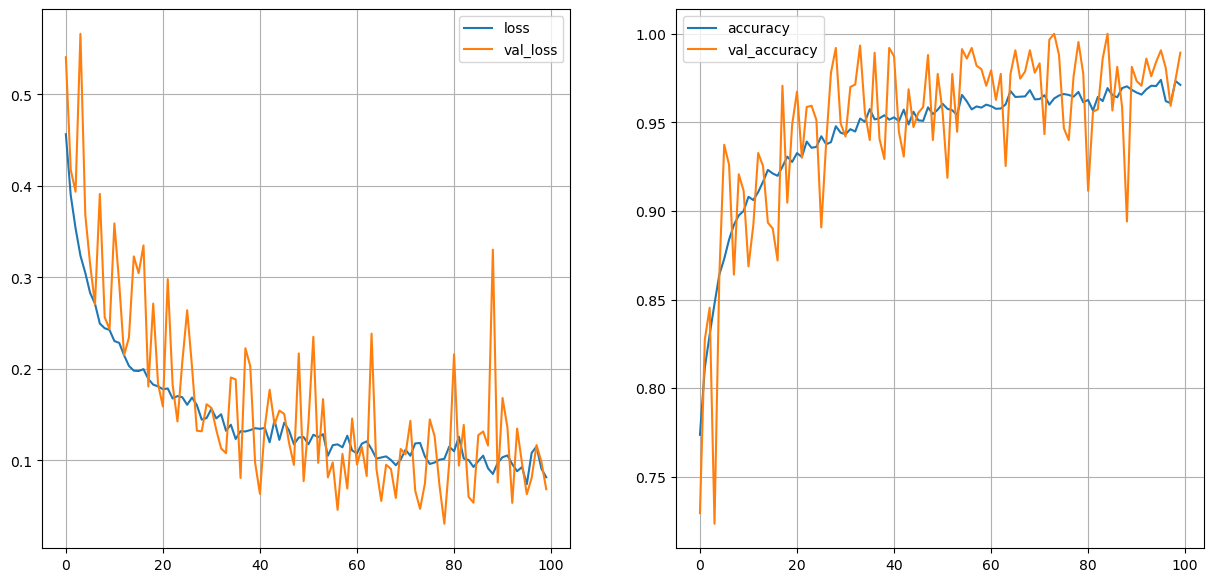

number of nodes 16, dropout_probability 0 , Learning rate 0.01 , batch size 32
31/31 [==============================] - 0s 2ms/step - loss: 54.8126 - accuracy: 0.4277


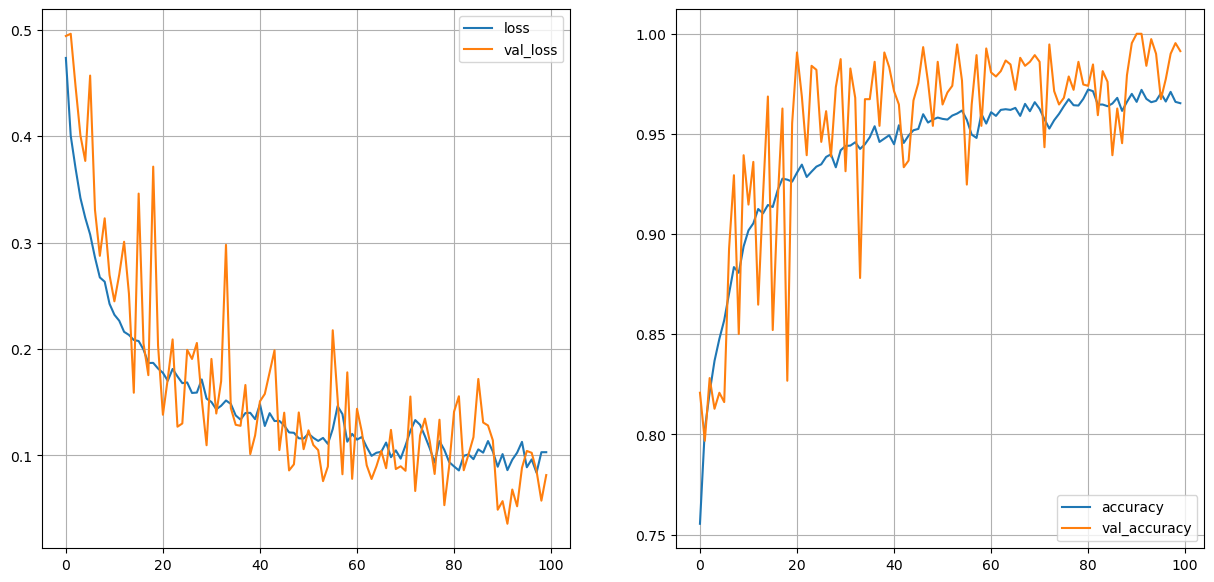

number of nodes 16, dropout_probability 0 , Learning rate 0.01 , batch size 64
31/31 [==============================] - 0s 2ms/step - loss: 320.5602 - accuracy: 0.0927


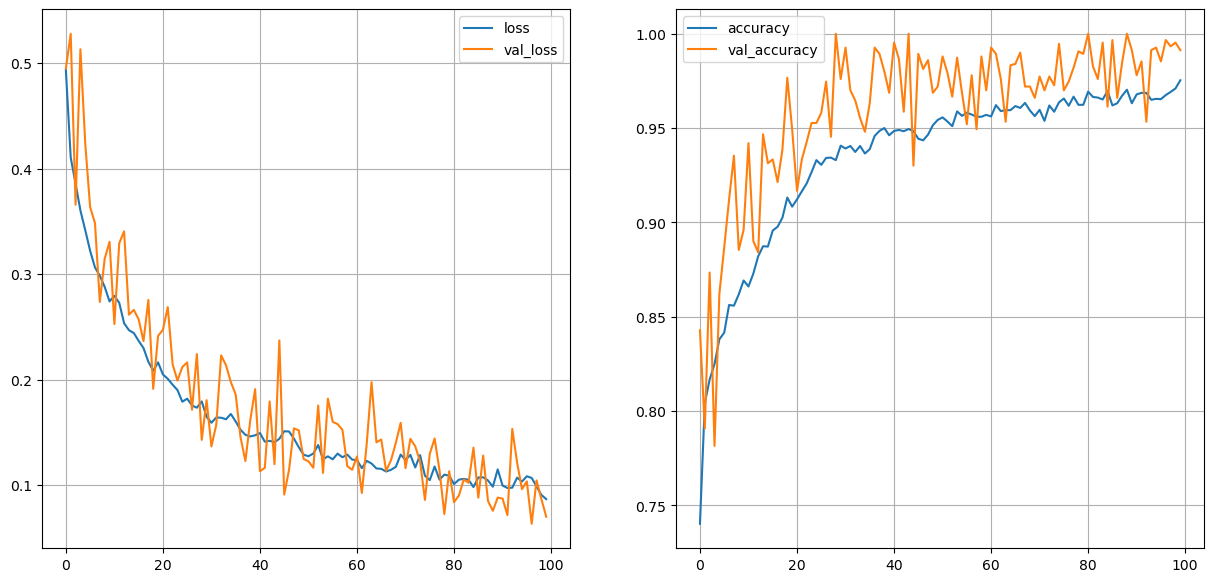

number of nodes 16, dropout_probability 0 , Learning rate 0.01 , batch size 128
31/31 [==============================] - 0s 2ms/step - loss: 196.6905 - accuracy: 0.1385


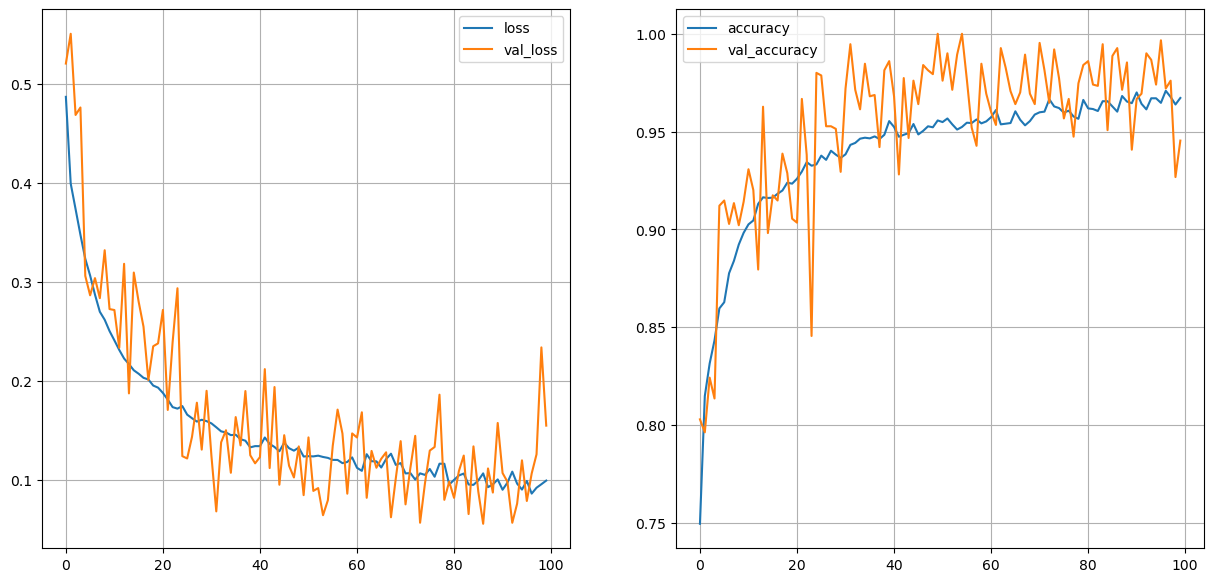

number of nodes 16, dropout_probability 0 , Learning rate 0.005 , batch size 32
31/31 [==============================] - 0s 4ms/step - loss: 19.4526 - accuracy: 0.9664


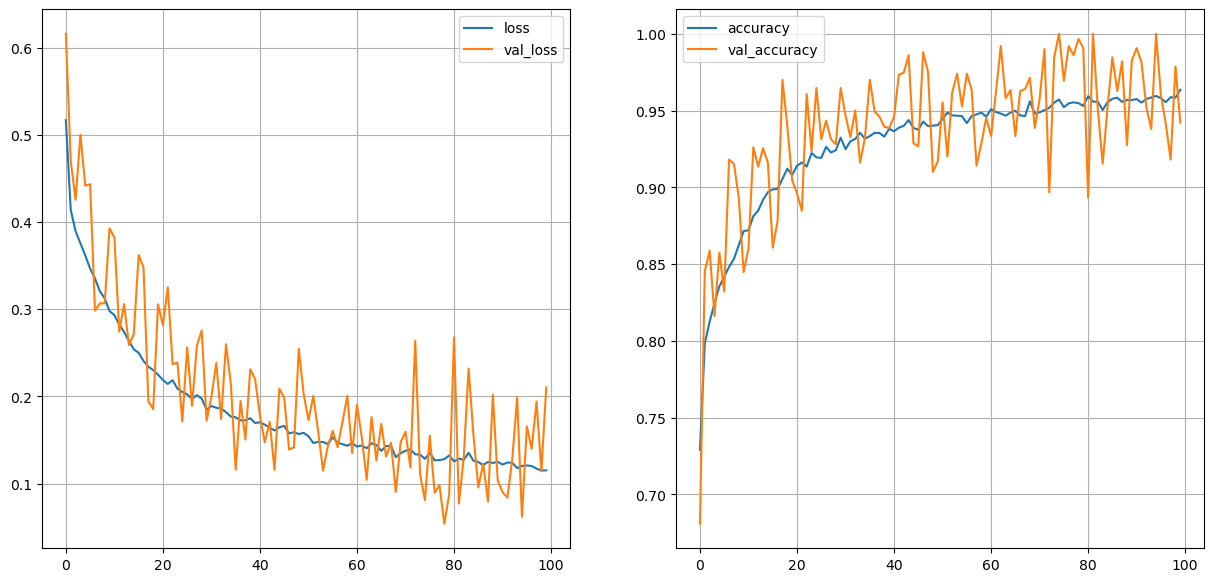

number of nodes 16, dropout_probability 0 , Learning rate 0.005 , batch size 64
31/31 [==============================] - 1s 5ms/step - loss: 160.7626 - accuracy: 0.1120


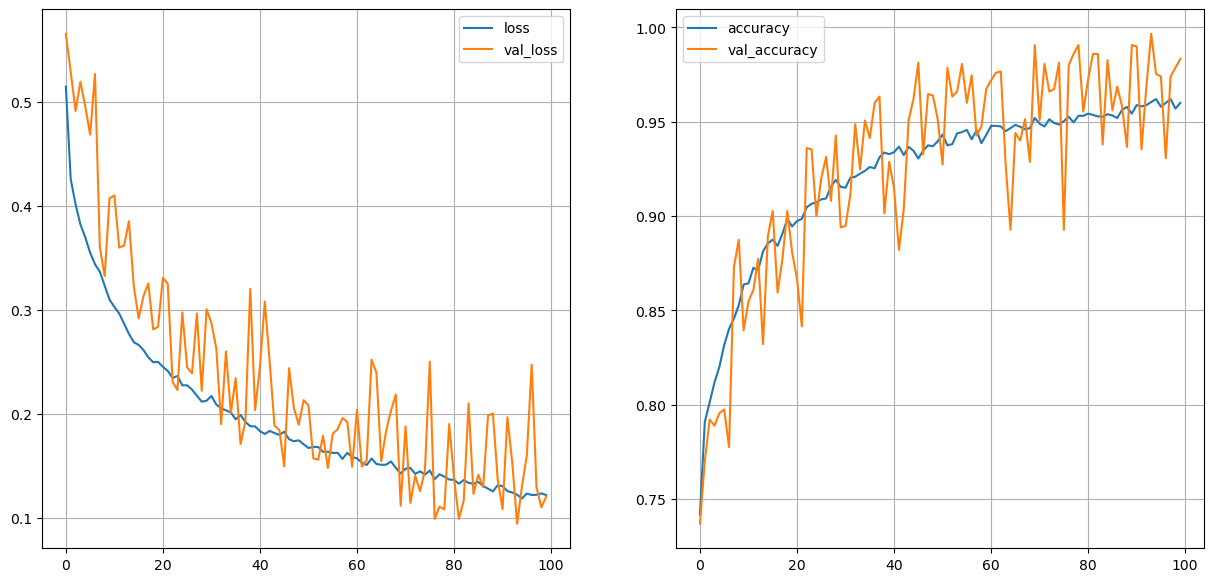

number of nodes 16, dropout_probability 0 , Learning rate 0.005 , batch size 128
31/31 [==============================] - 0s 2ms/step - loss: 49.1614 - accuracy: 0.4145


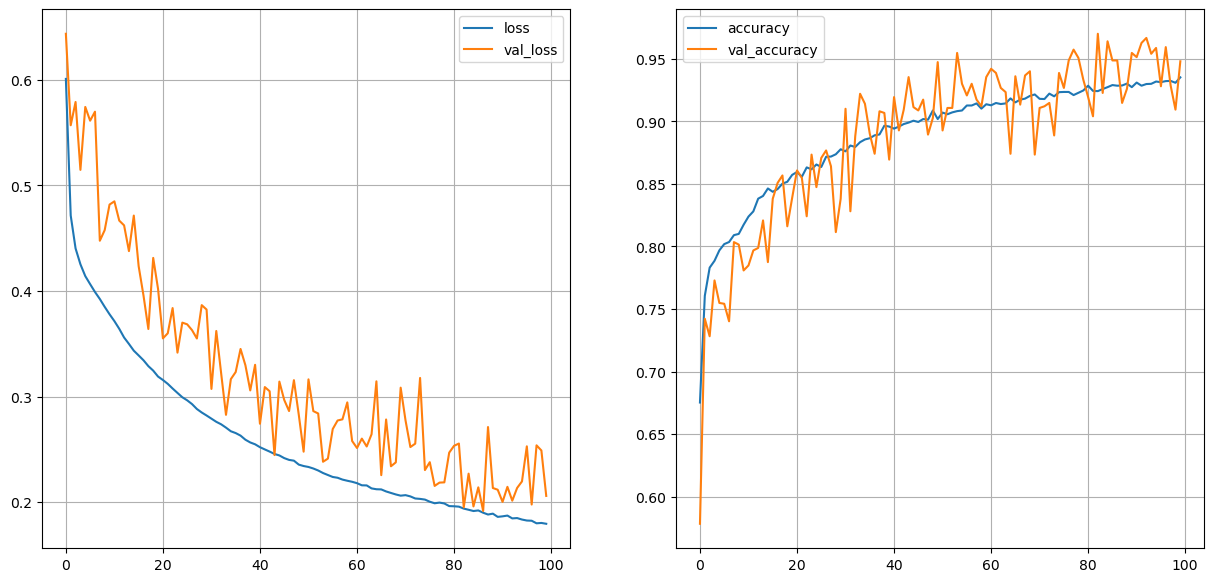

number of nodes 16, dropout_probability 0 , Learning rate 0.001 , batch size 32
31/31 [==============================] - 0s 2ms/step - loss: 53.6857 - accuracy: 0.3880


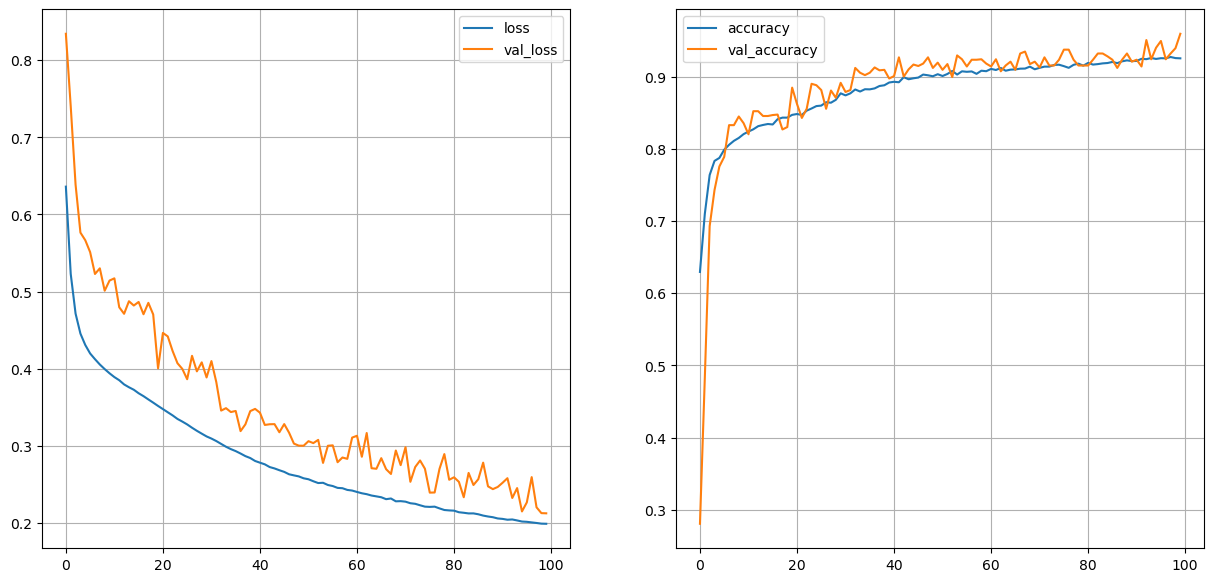

number of nodes 16, dropout_probability 0 , Learning rate 0.001 , batch size 64
31/31 [==============================] - 0s 2ms/step - loss: 101.3889 - accuracy: 0.0336


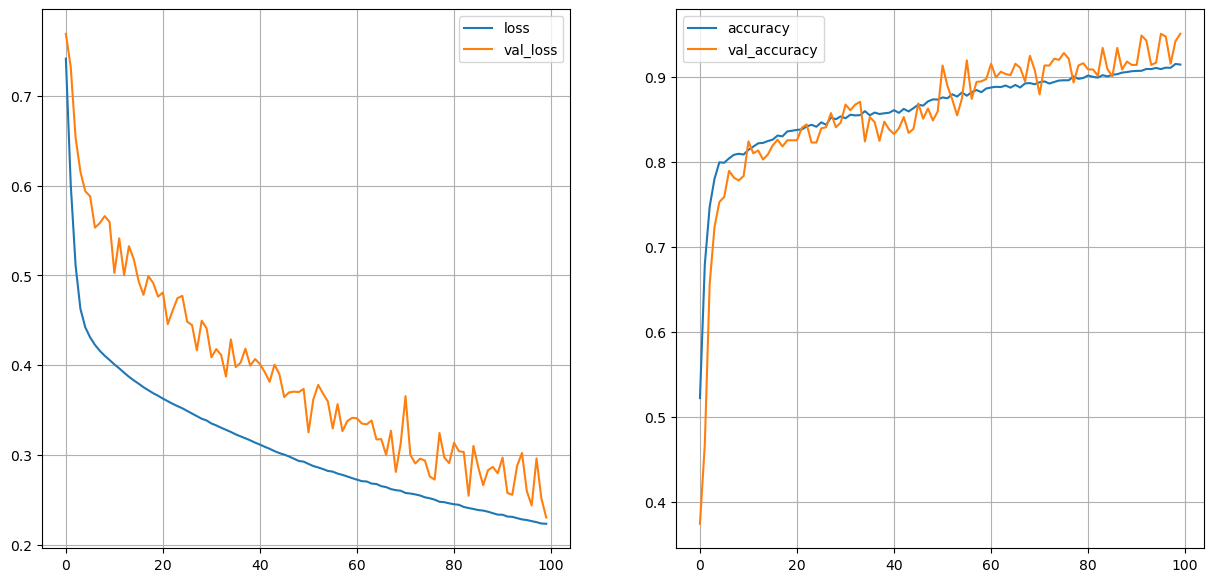

number of nodes 16, dropout_probability 0 , Learning rate 0.001 , batch size 128
31/31 [==============================] - 0s 2ms/step - loss: 25.2926 - accuracy: 0.4572


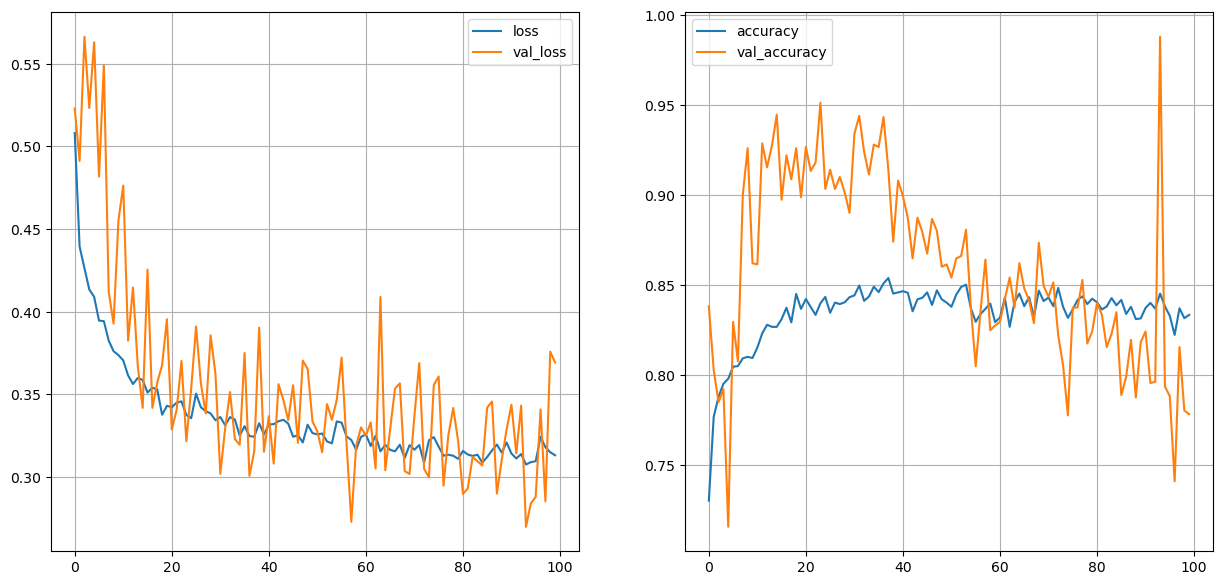

number of nodes 16, dropout_probability 0.2 , Learning rate 0.01 , batch size 32
31/31 [==============================] - 0s 3ms/step - loss: 21.2953 - accuracy: 0.8910


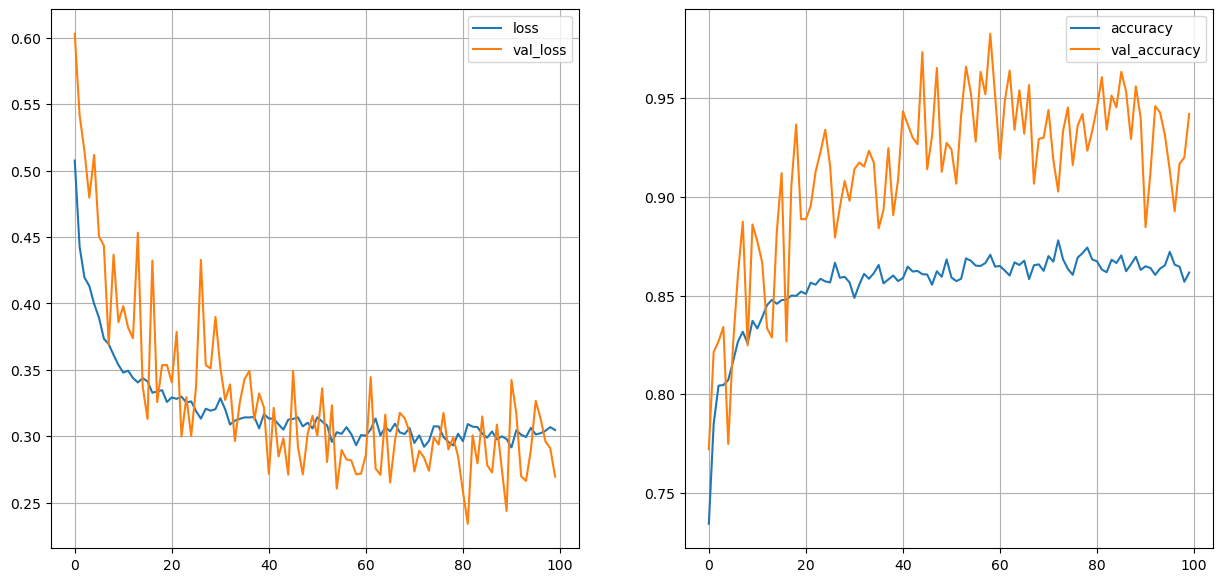

number of nodes 16, dropout_probability 0.2 , Learning rate 0.01 , batch size 64
31/31 [==============================] - 0s 2ms/step - loss: 41.3460 - accuracy: 0.1558


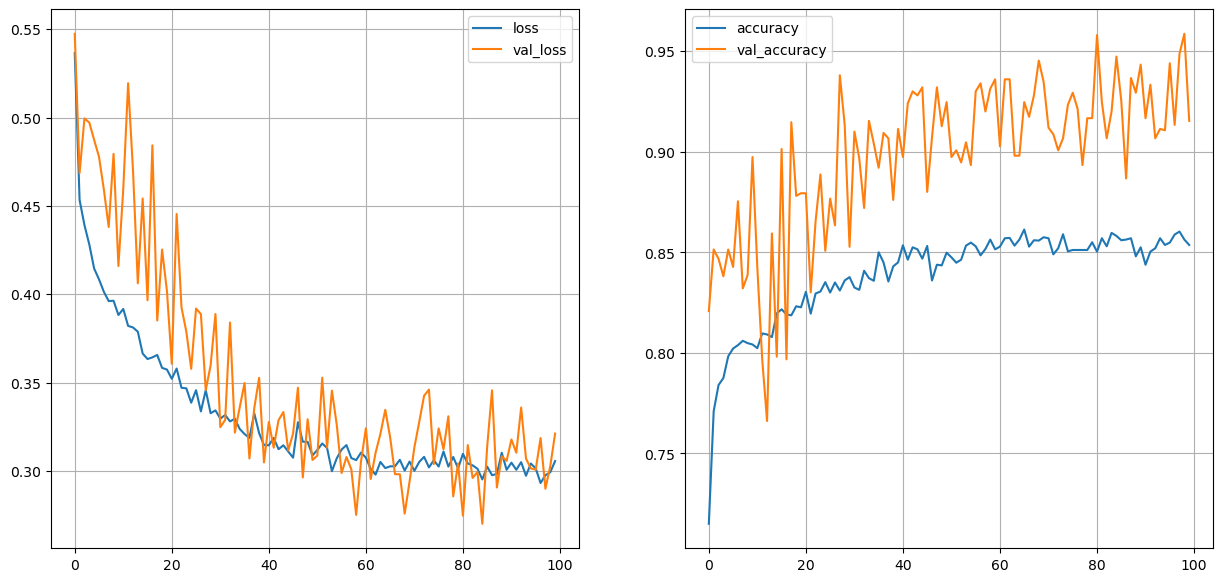

number of nodes 16, dropout_probability 0.2 , Learning rate 0.01 , batch size 128
31/31 [==============================] - 0s 2ms/step - loss: 30.0193 - accuracy: 0.3432


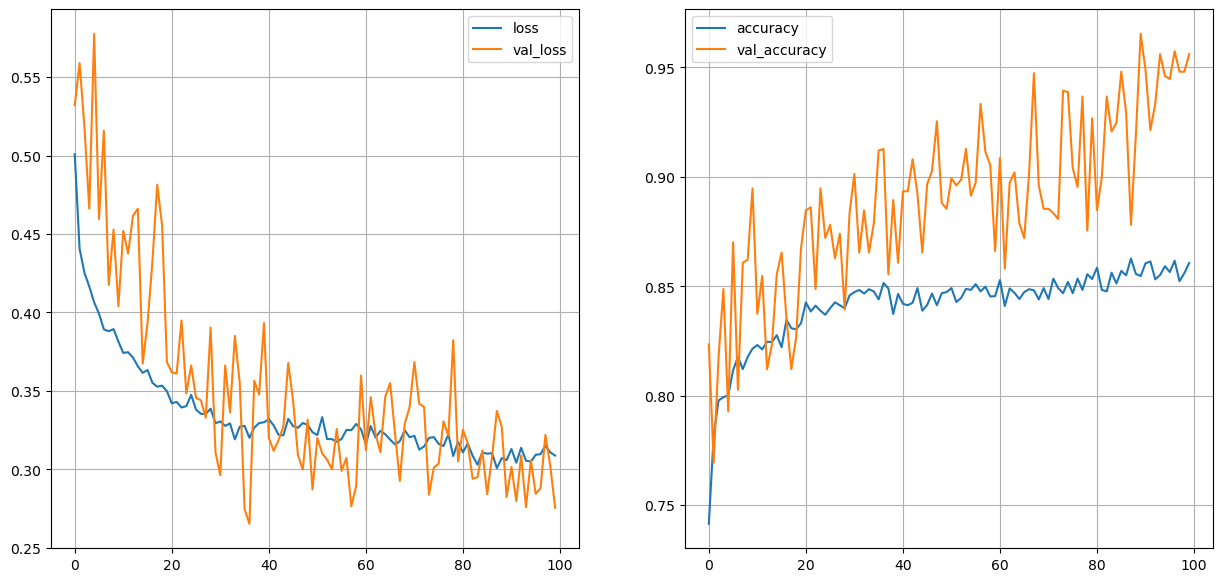

number of nodes 16, dropout_probability 0.2 , Learning rate 0.005 , batch size 32
31/31 [==============================] - 0s 2ms/step - loss: 30.2866 - accuracy: 0.3116


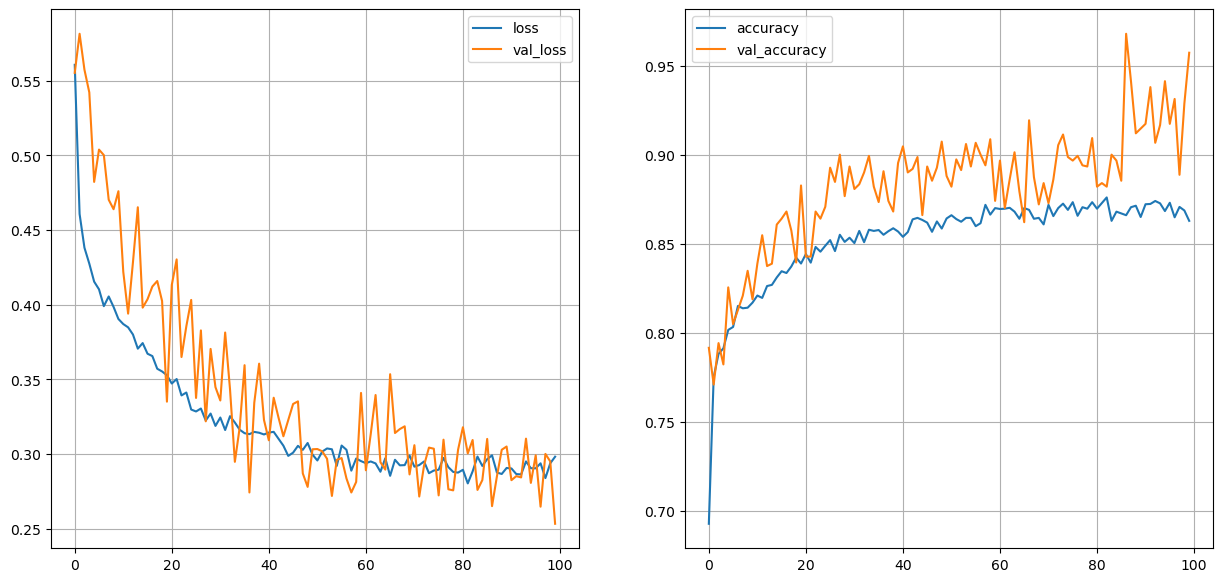

number of nodes 16, dropout_probability 0.2 , Learning rate 0.005 , batch size 64
31/31 [==============================] - 0s 2ms/step - loss: 28.5460 - accuracy: 0.4236


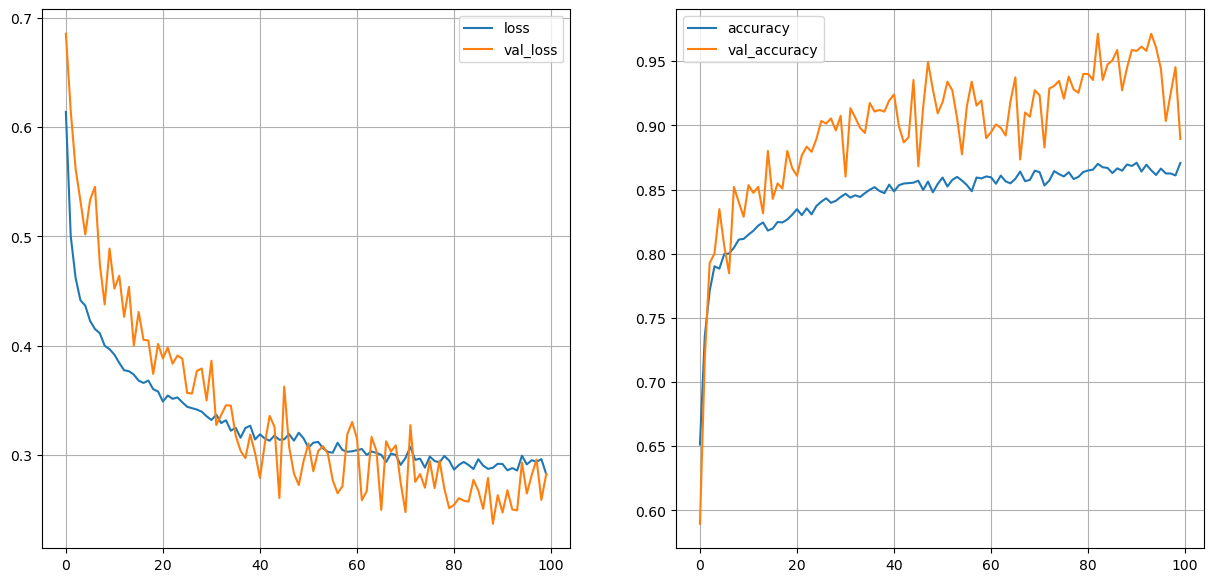

number of nodes 16, dropout_probability 0.2 , Learning rate 0.005 , batch size 128
31/31 [==============================] - 0s 2ms/step - loss: 10.2912 - accuracy: 0.8075


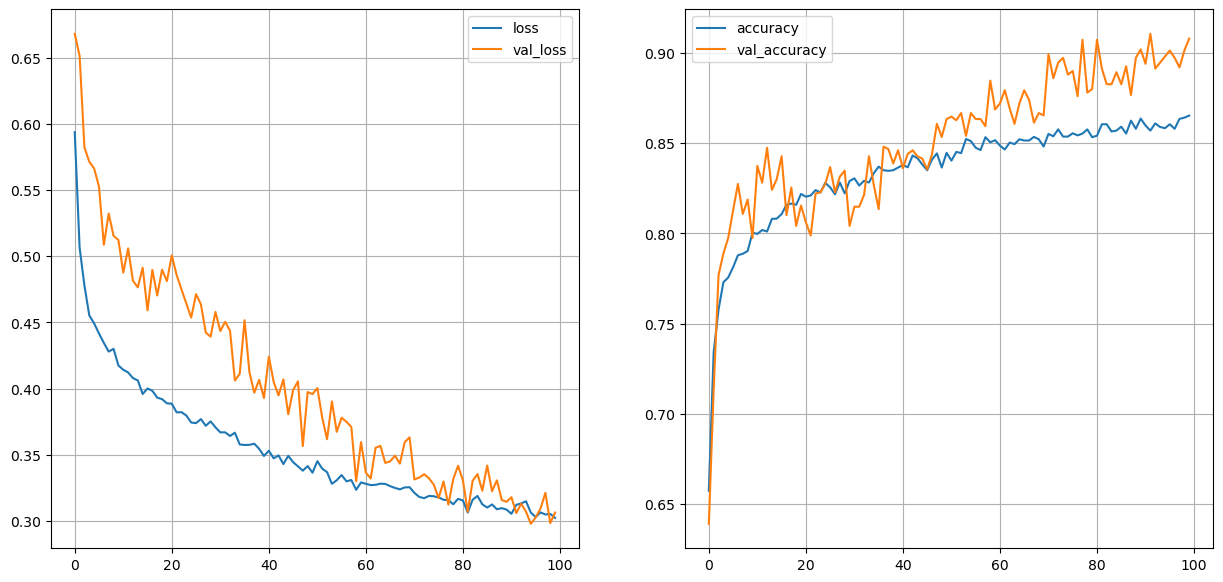

number of nodes 16, dropout_probability 0.2 , Learning rate 0.001 , batch size 32
31/31 [==============================] - 0s 2ms/step - loss: 2.5326 - accuracy: 0.7963


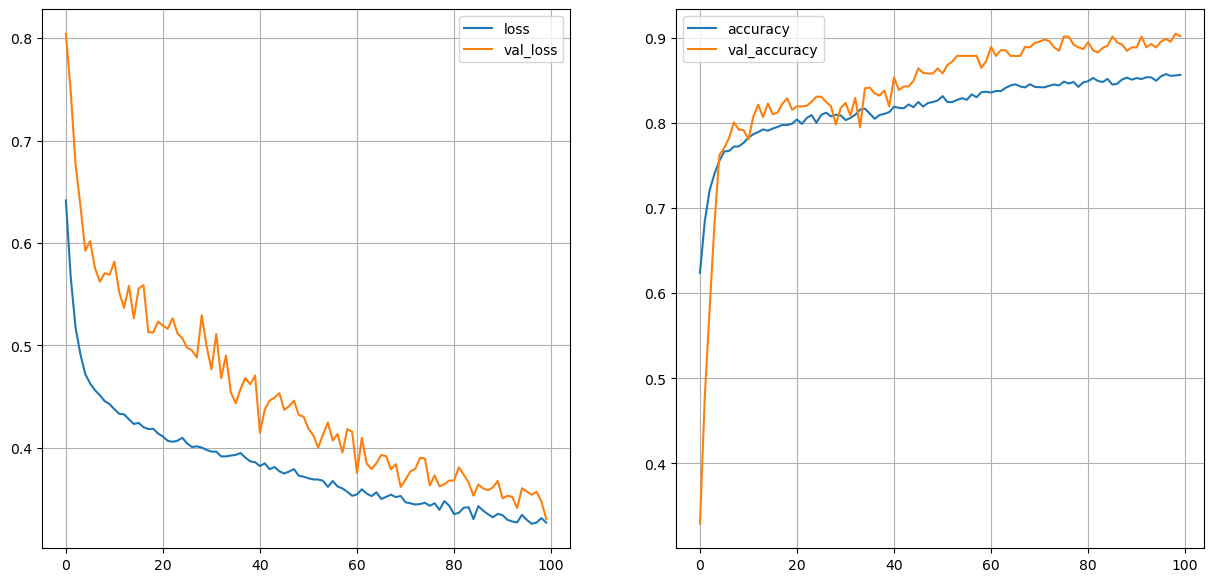

number of nodes 16, dropout_probability 0.2 , Learning rate 0.001 , batch size 64
31/31 [==============================] - 0s 2ms/step - loss: 37.4672 - accuracy: 0.2943


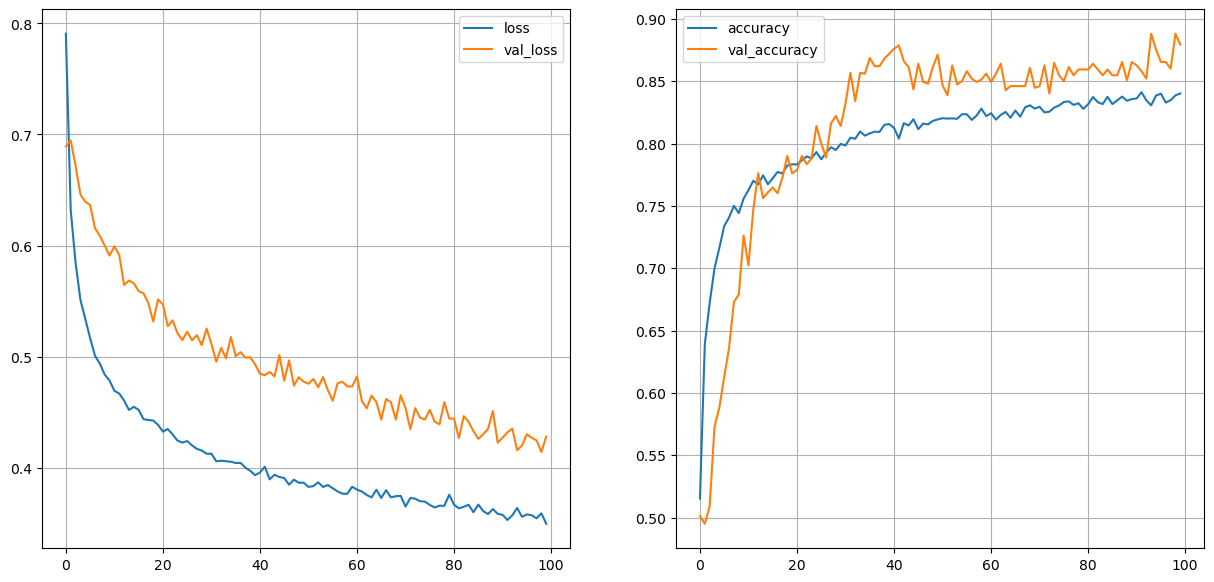

number of nodes 16, dropout_probability 0.2 , Learning rate 0.001 , batch size 128
31/31 [==============================] - 0s 2ms/step - loss: 46.0998 - accuracy: 0.1823


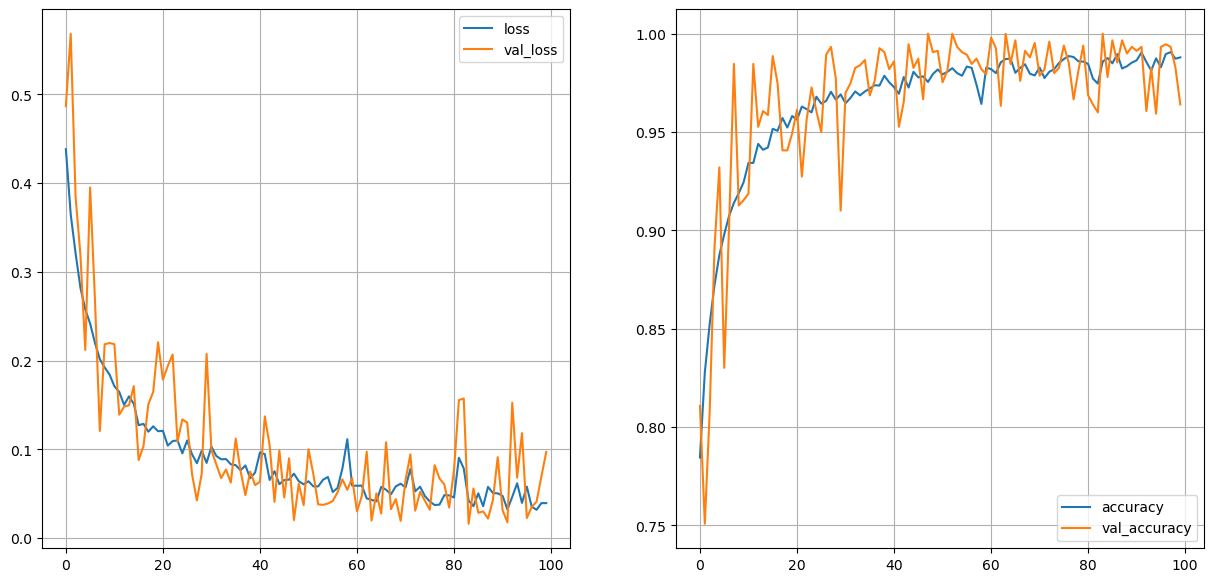

number of nodes 32, dropout_probability 0 , Learning rate 0.01 , batch size 32
31/31 [==============================] - 0s 2ms/step - loss: 60.6621 - accuracy: 0.4603


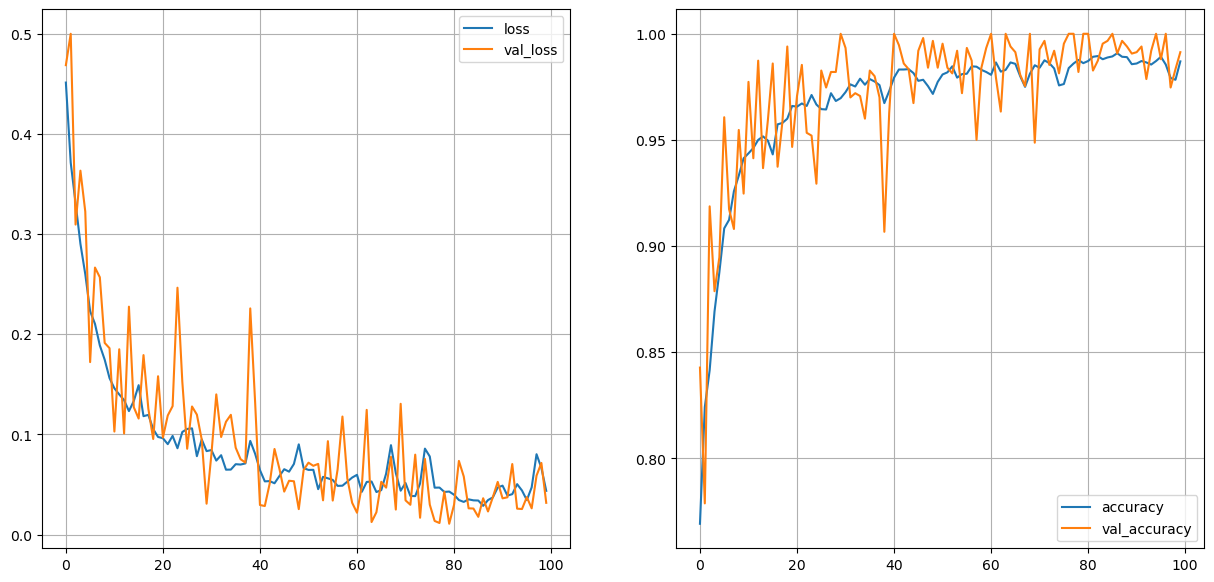

number of nodes 32, dropout_probability 0 , Learning rate 0.01 , batch size 64
31/31 [==============================] - 0s 2ms/step - loss: 15.8174 - accuracy: 0.9664


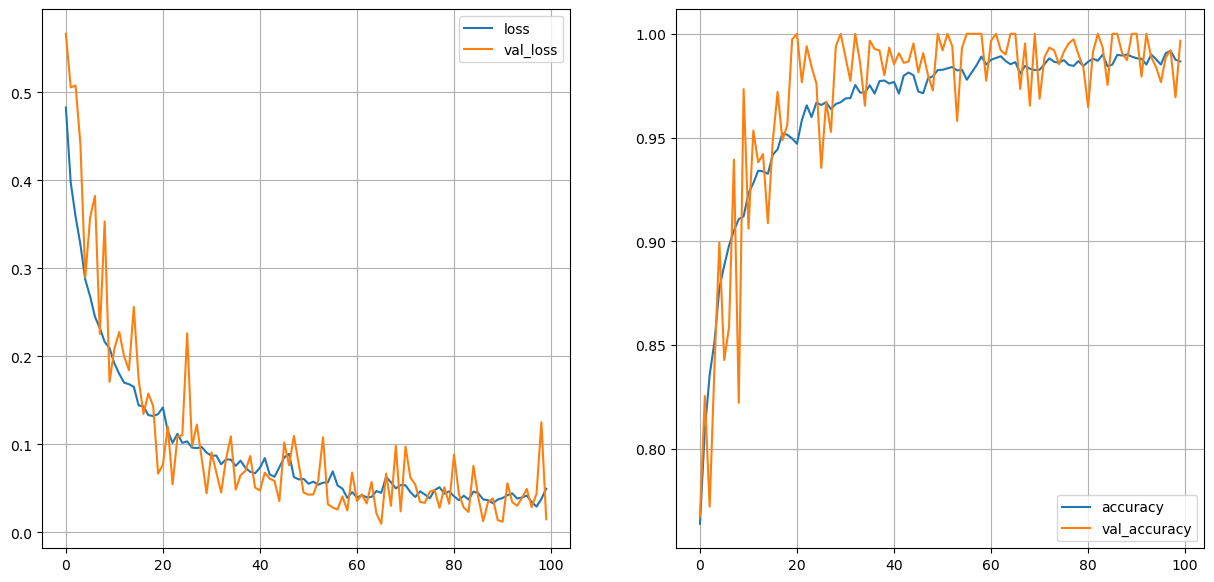

number of nodes 32, dropout_probability 0 , Learning rate 0.01 , batch size 128
31/31 [==============================] - 0s 2ms/step - loss: 221.3380 - accuracy: 0.3238


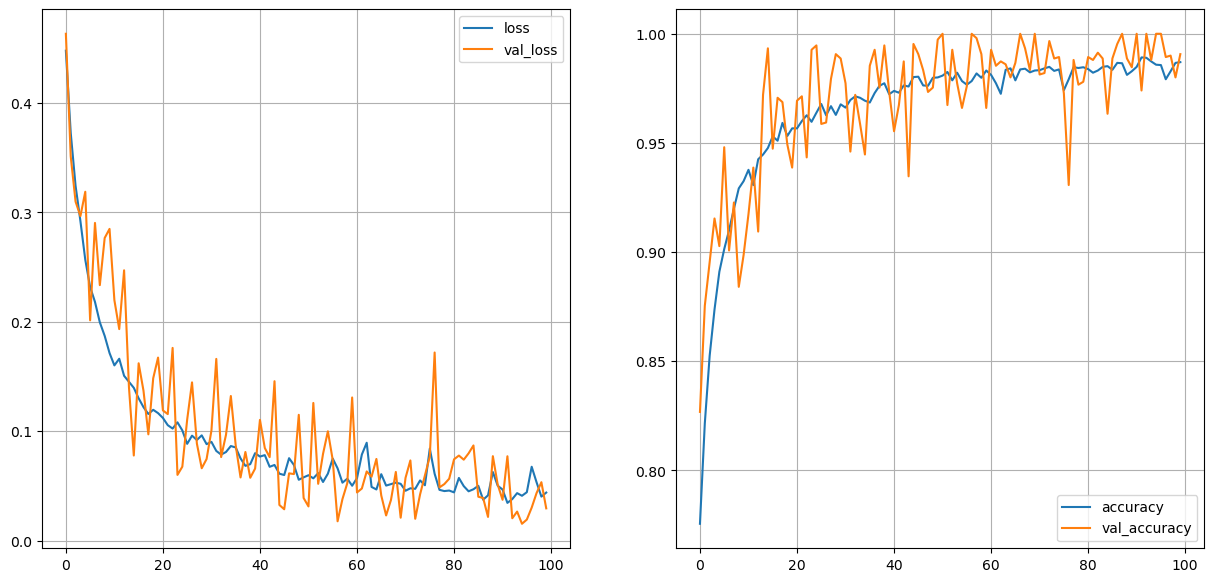

number of nodes 32, dropout_probability 0 , Learning rate 0.005 , batch size 32
31/31 [==============================] - 0s 2ms/step - loss: 35.0167 - accuracy: 0.6782


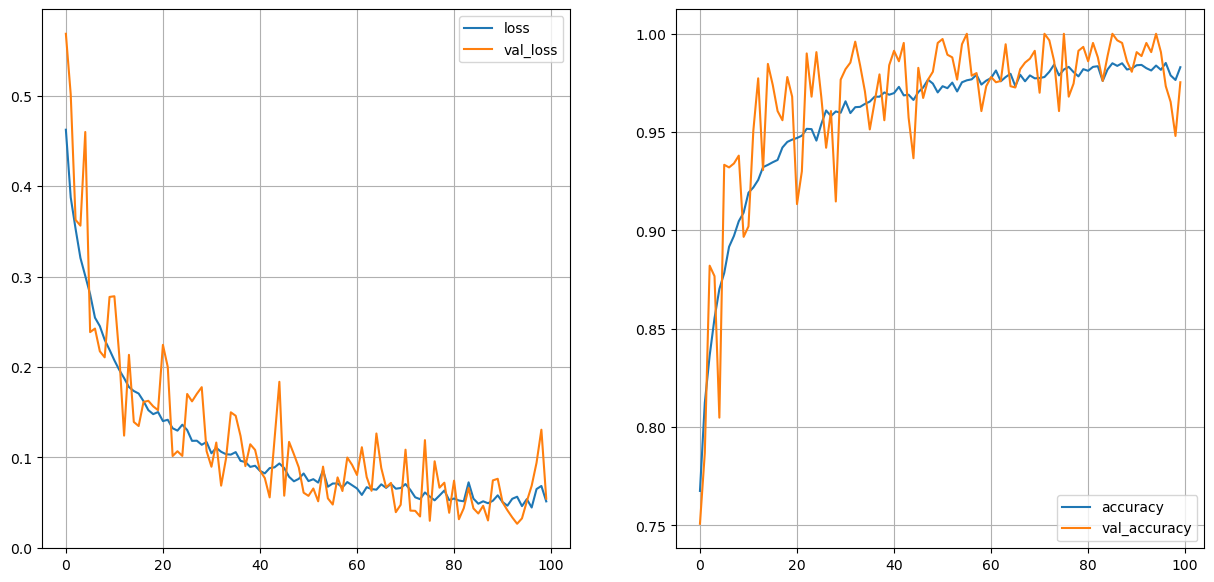

number of nodes 32, dropout_probability 0 , Learning rate 0.005 , batch size 64
31/31 [==============================] - 0s 2ms/step - loss: 58.4843 - accuracy: 0.7281


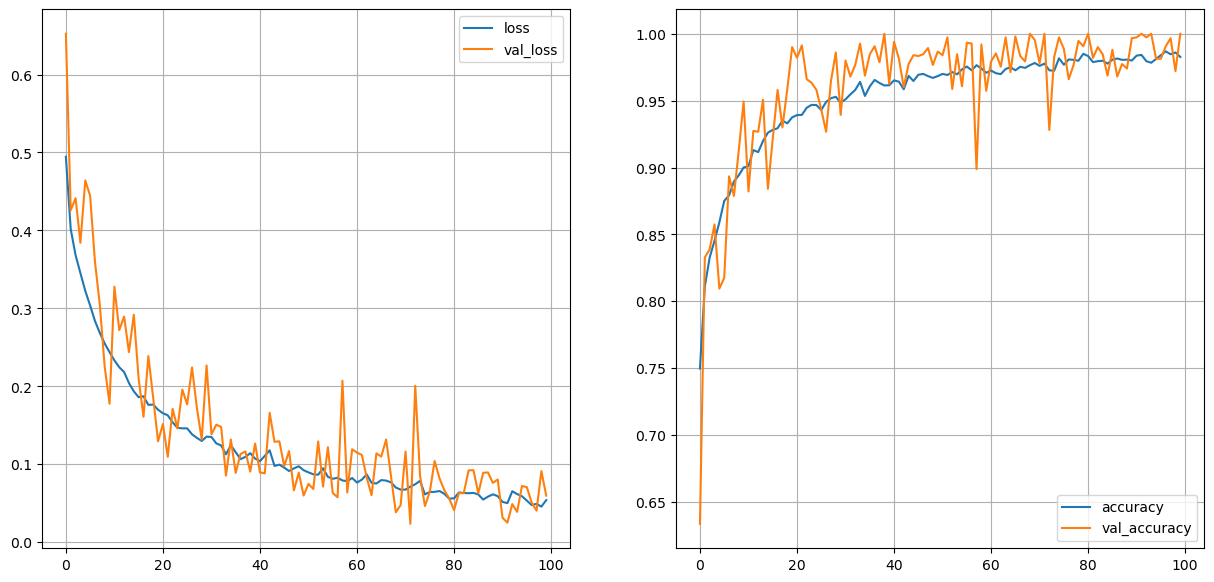

number of nodes 32, dropout_probability 0 , Learning rate 0.005 , batch size 128
31/31 [==============================] - 0s 2ms/step - loss: 24.3825 - accuracy: 0.9664


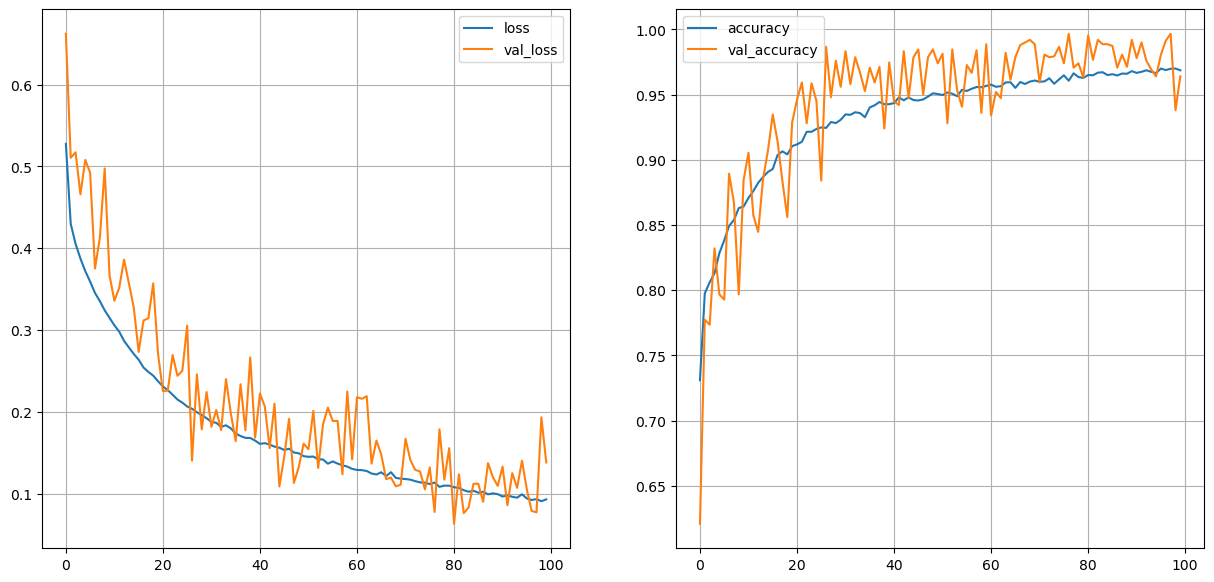

number of nodes 32, dropout_probability 0 , Learning rate 0.001 , batch size 32
31/31 [==============================] - 0s 2ms/step - loss: 80.0893 - accuracy: 0.2831


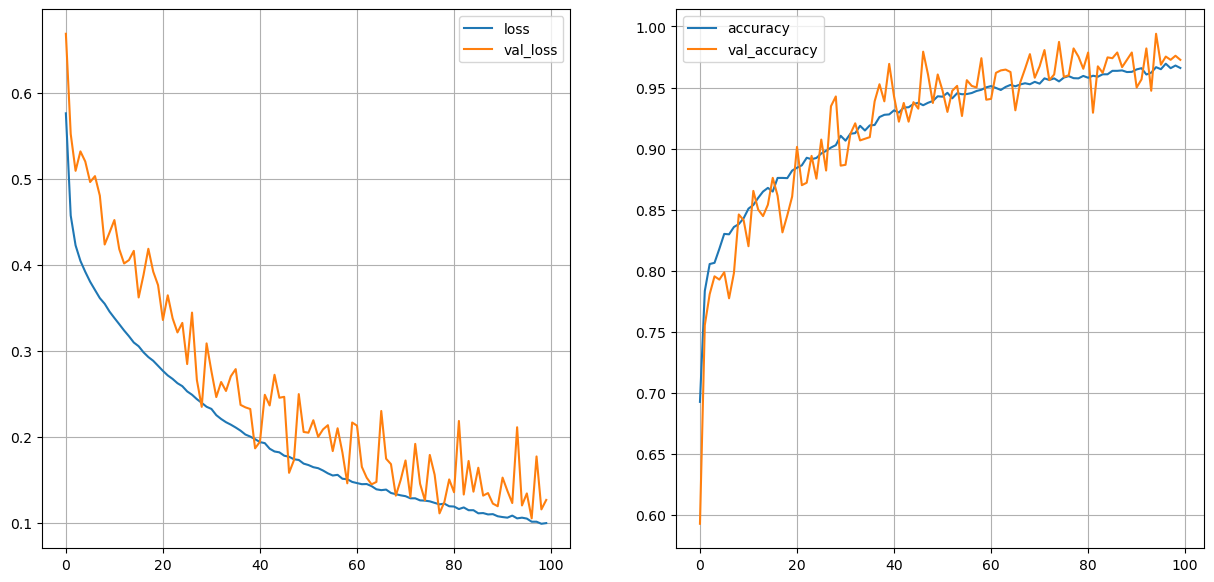

number of nodes 32, dropout_probability 0 , Learning rate 0.001 , batch size 64
31/31 [==============================] - 0s 2ms/step - loss: 131.3587 - accuracy: 0.2760


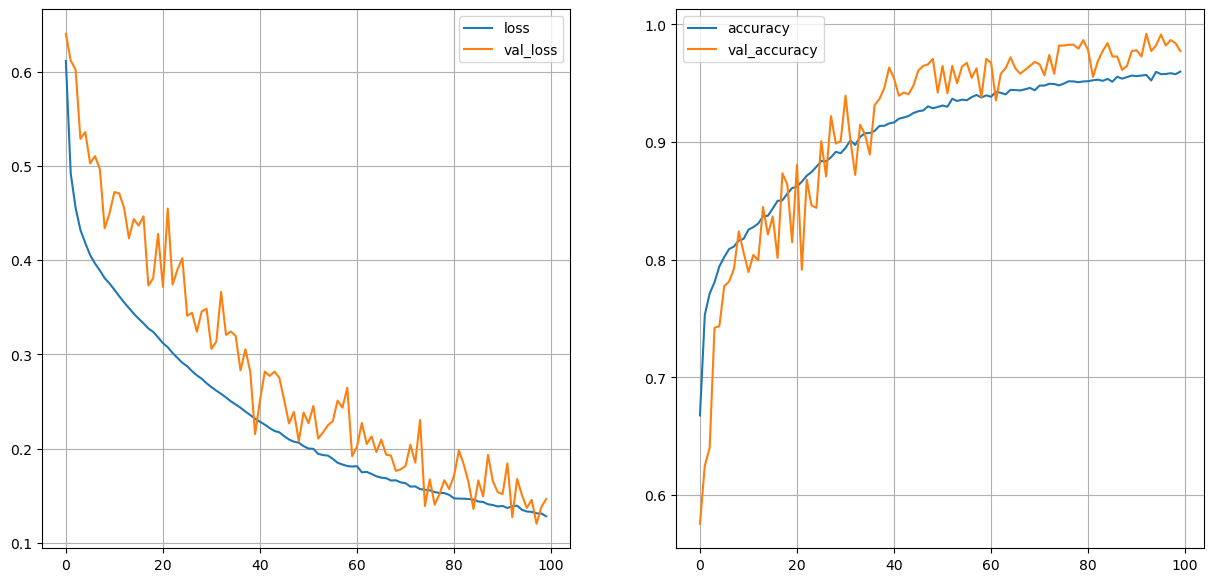

number of nodes 32, dropout_probability 0 , Learning rate 0.001 , batch size 128
31/31 [==============================] - 0s 2ms/step - loss: 31.9820 - accuracy: 0.4837


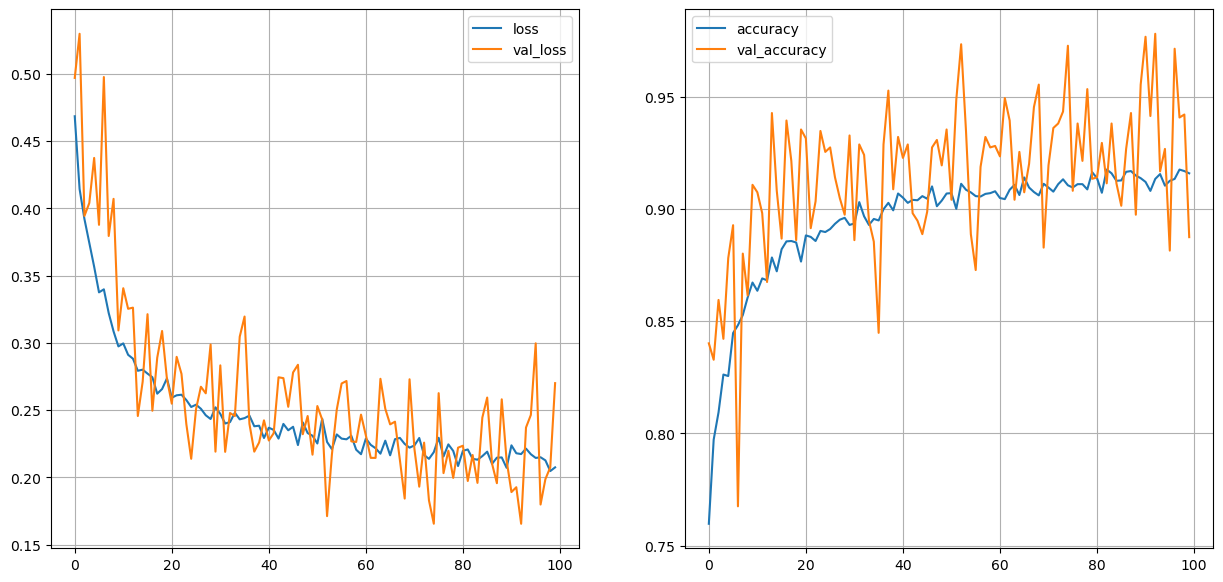

number of nodes 32, dropout_probability 0.2 , Learning rate 0.01 , batch size 32
31/31 [==============================] - 0s 2ms/step - loss: 29.7519 - accuracy: 0.4185


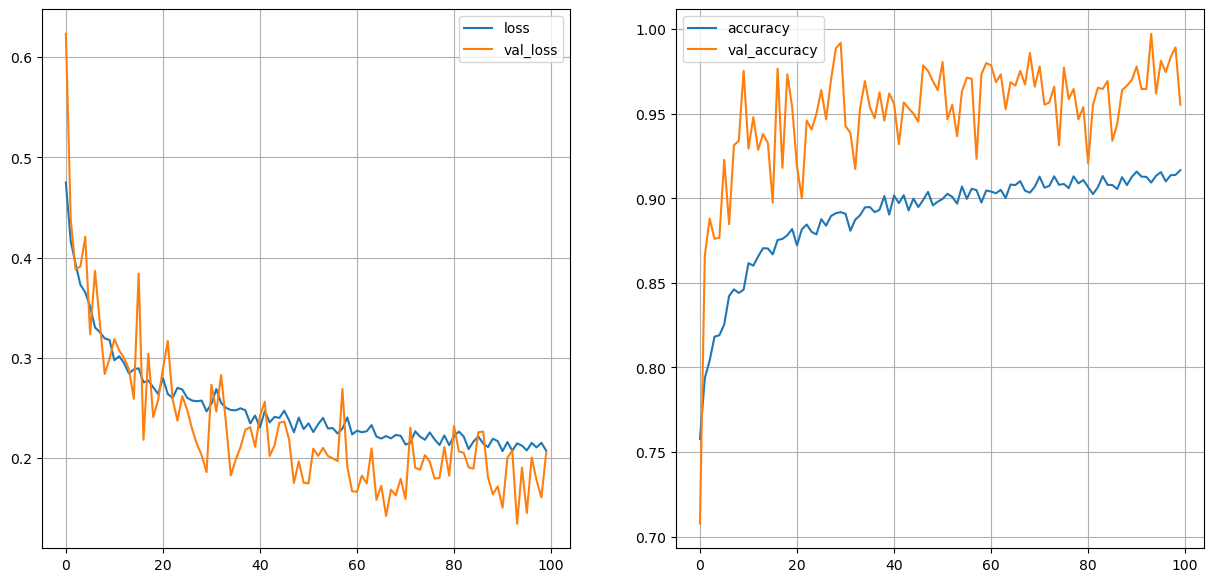

number of nodes 32, dropout_probability 0.2 , Learning rate 0.01 , batch size 64
31/31 [==============================] - 0s 2ms/step - loss: 25.3533 - accuracy: 0.4389


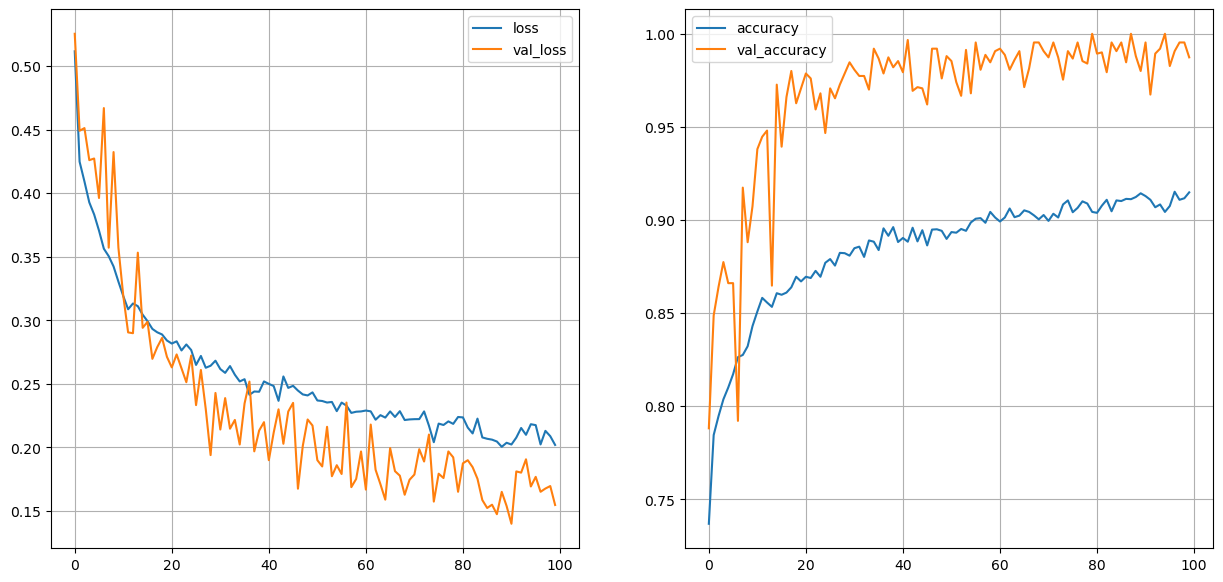

number of nodes 32, dropout_probability 0.2 , Learning rate 0.01 , batch size 128
31/31 [==============================] - 0s 2ms/step - loss: 37.6307 - accuracy: 0.8798


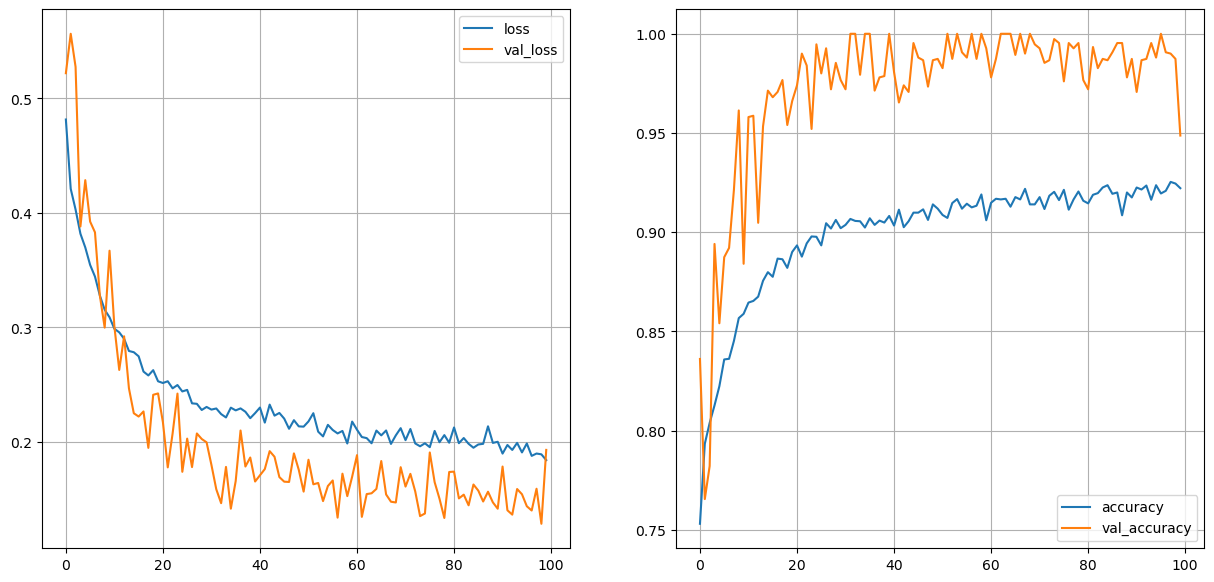

number of nodes 32, dropout_probability 0.2 , Learning rate 0.005 , batch size 32
31/31 [==============================] - 0s 2ms/step - loss: 23.9991 - accuracy: 0.7546


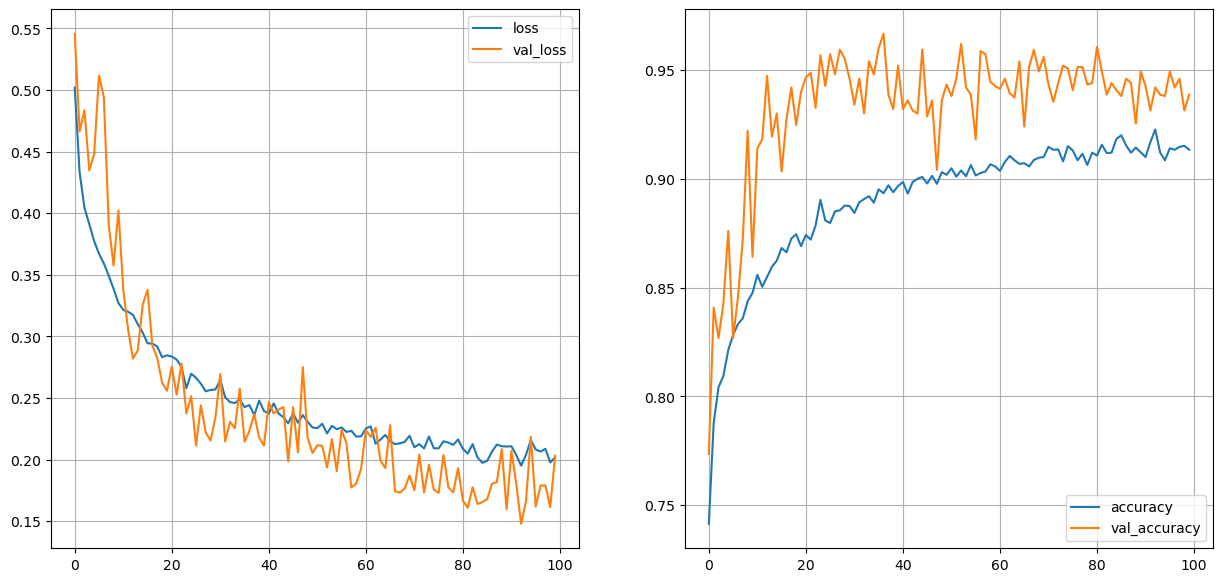

number of nodes 32, dropout_probability 0.2 , Learning rate 0.005 , batch size 64
31/31 [==============================] - 0s 2ms/step - loss: 27.2290 - accuracy: 0.9664


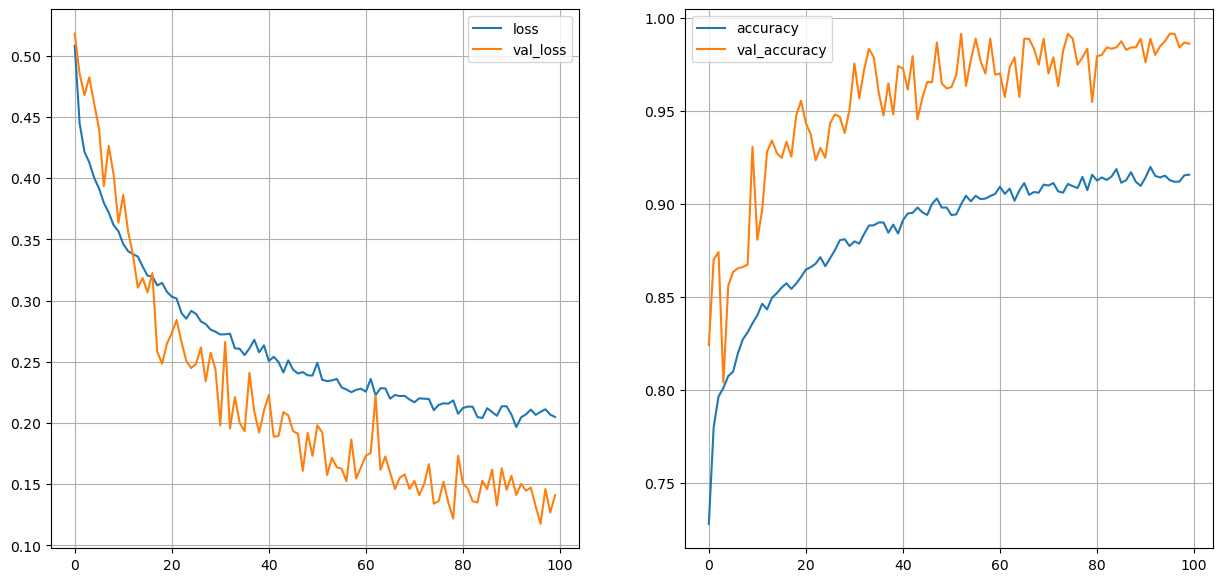

number of nodes 32, dropout_probability 0.2 , Learning rate 0.005 , batch size 128
31/31 [==============================] - 0s 2ms/step - loss: 12.5337 - accuracy: 0.4409


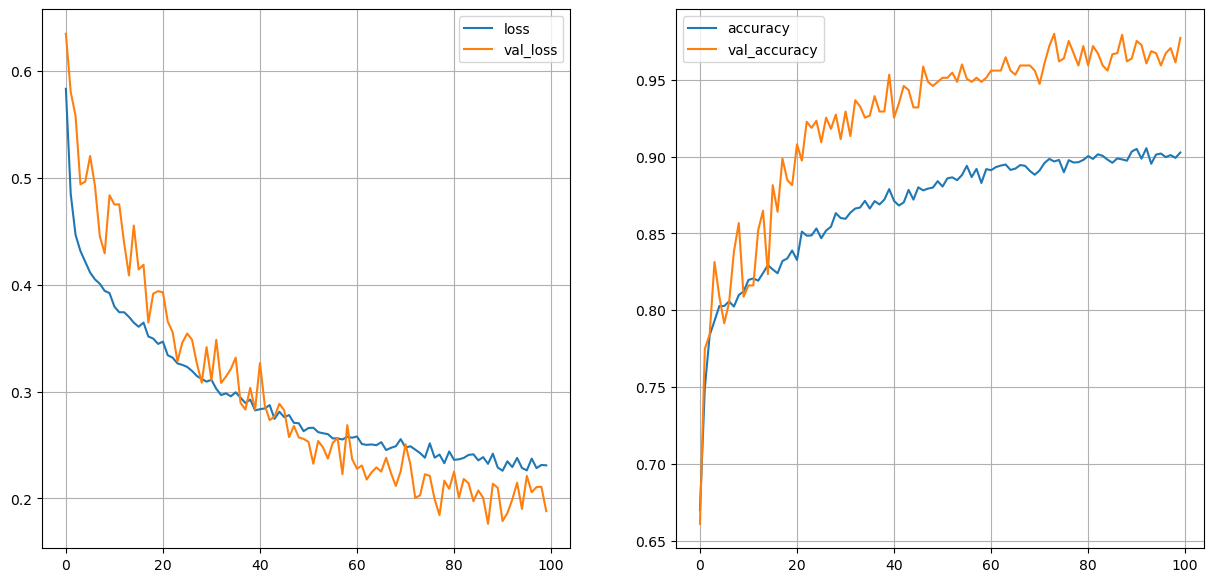

number of nodes 32, dropout_probability 0.2 , Learning rate 0.001 , batch size 32
31/31 [==============================] - 0s 2ms/step - loss: 9.6496 - accuracy: 0.7413


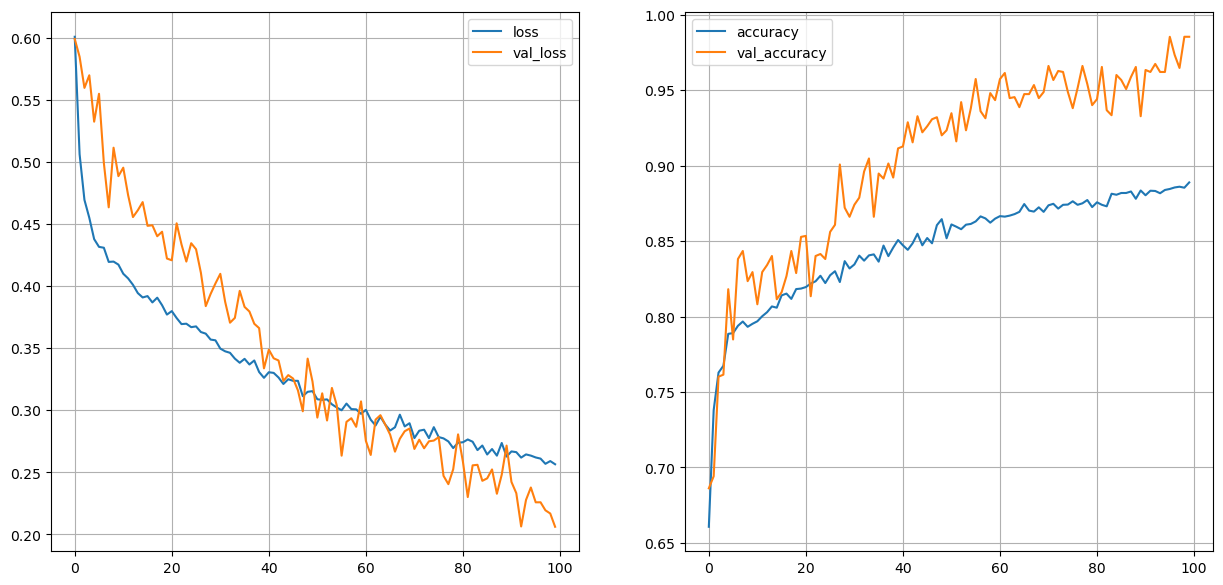

number of nodes 32, dropout_probability 0.2 , Learning rate 0.001 , batch size 64
31/31 [==============================] - 0s 2ms/step - loss: 13.5721 - accuracy: 0.5214


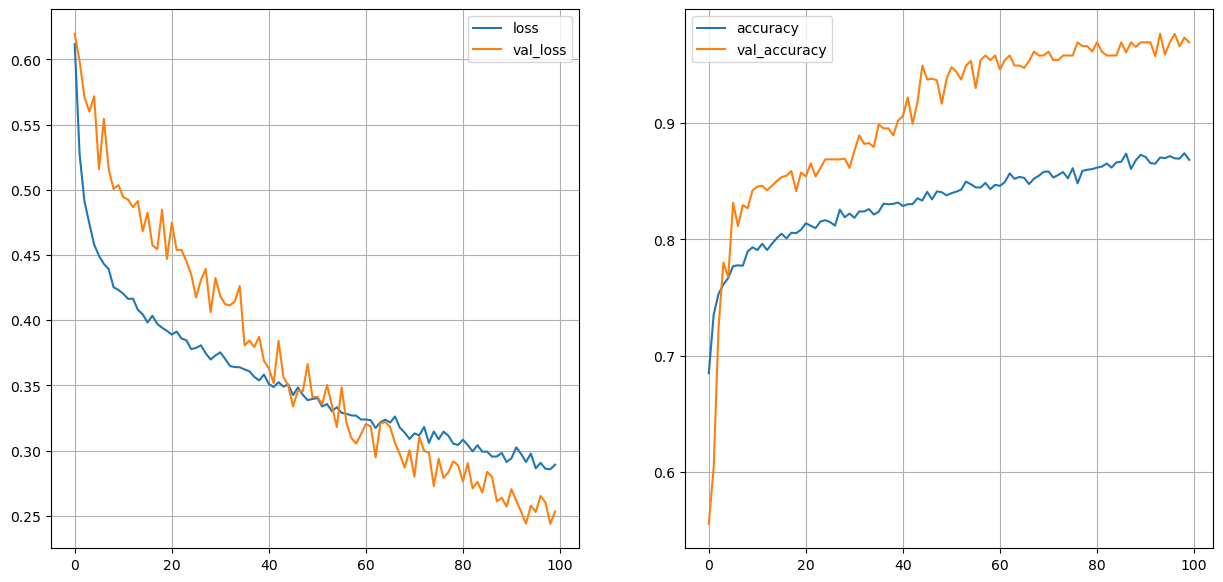

number of nodes 32, dropout_probability 0.2 , Learning rate 0.001 , batch size 128
31/31 [==============================] - 0s 2ms/step - loss: 47.3456 - accuracy: 0.2424


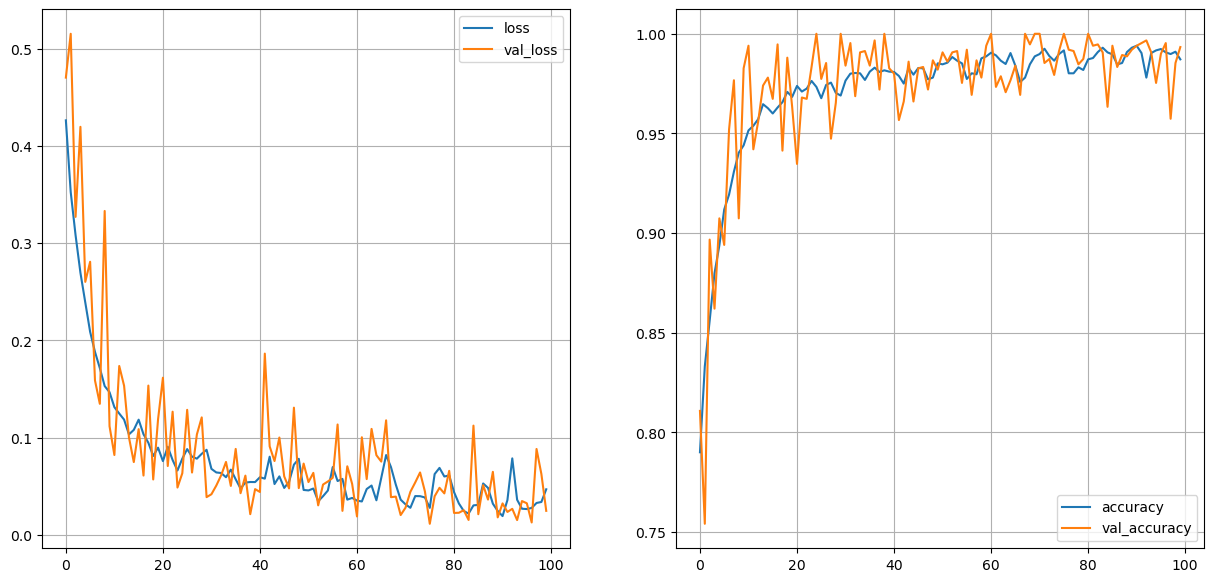

number of nodes 64, dropout_probability 0 , Learning rate 0.01 , batch size 32
31/31 [==============================] - 0s 2ms/step - loss: 144.0738 - accuracy: 0.4134


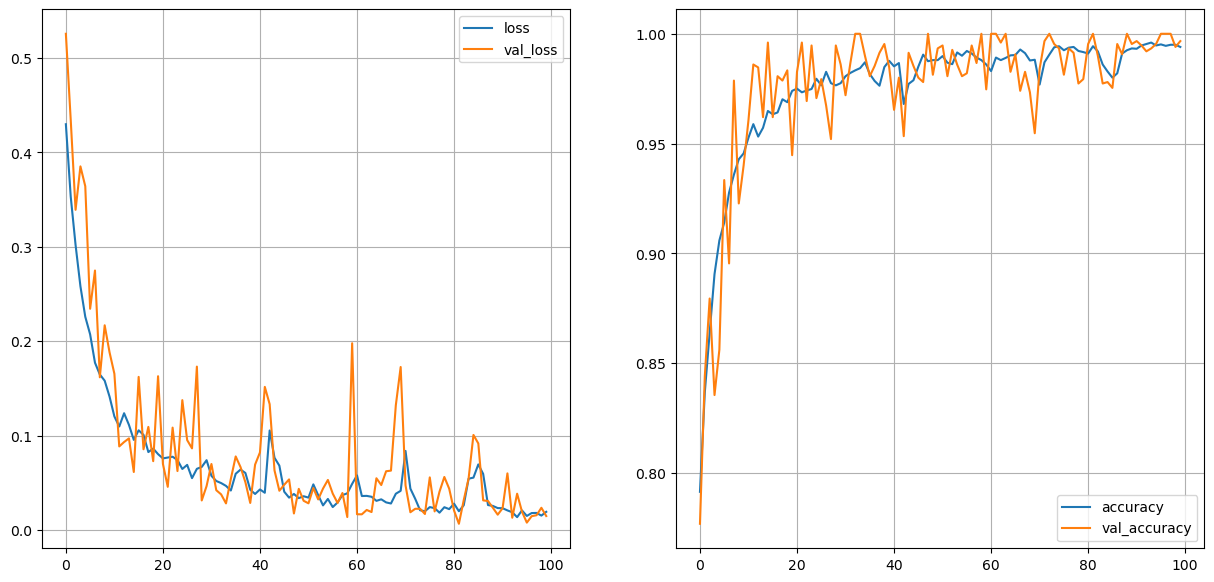

number of nodes 64, dropout_probability 0 , Learning rate 0.01 , batch size 64
31/31 [==============================] - 0s 2ms/step - loss: 108.7762 - accuracy: 0.5998


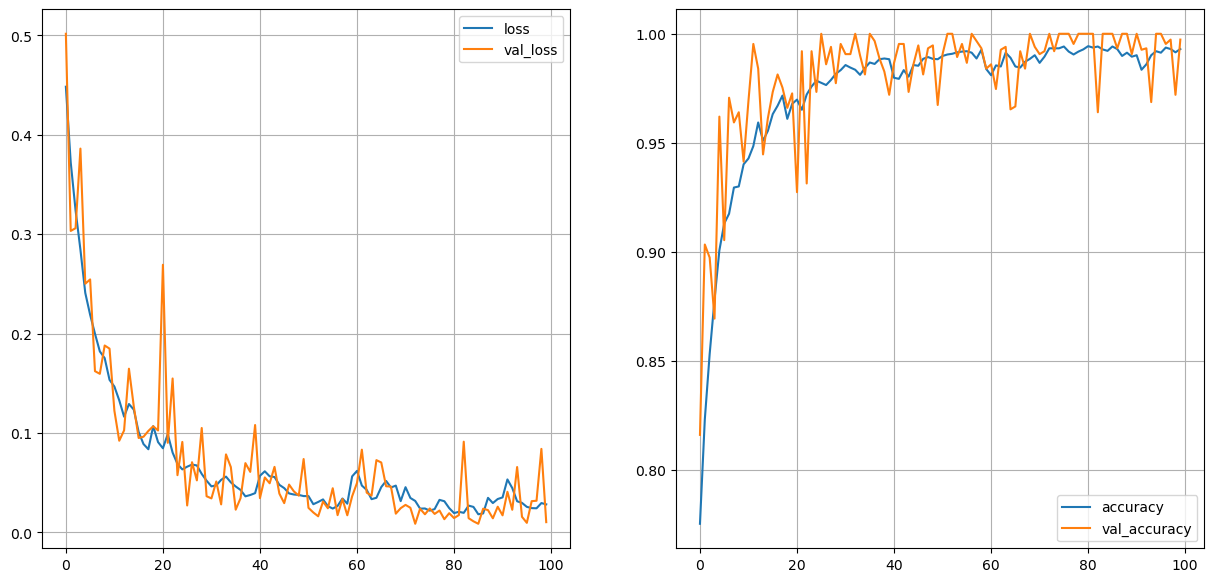

number of nodes 64, dropout_probability 0 , Learning rate 0.01 , batch size 128
31/31 [==============================] - 0s 2ms/step - loss: 83.0309 - accuracy: 0.5183


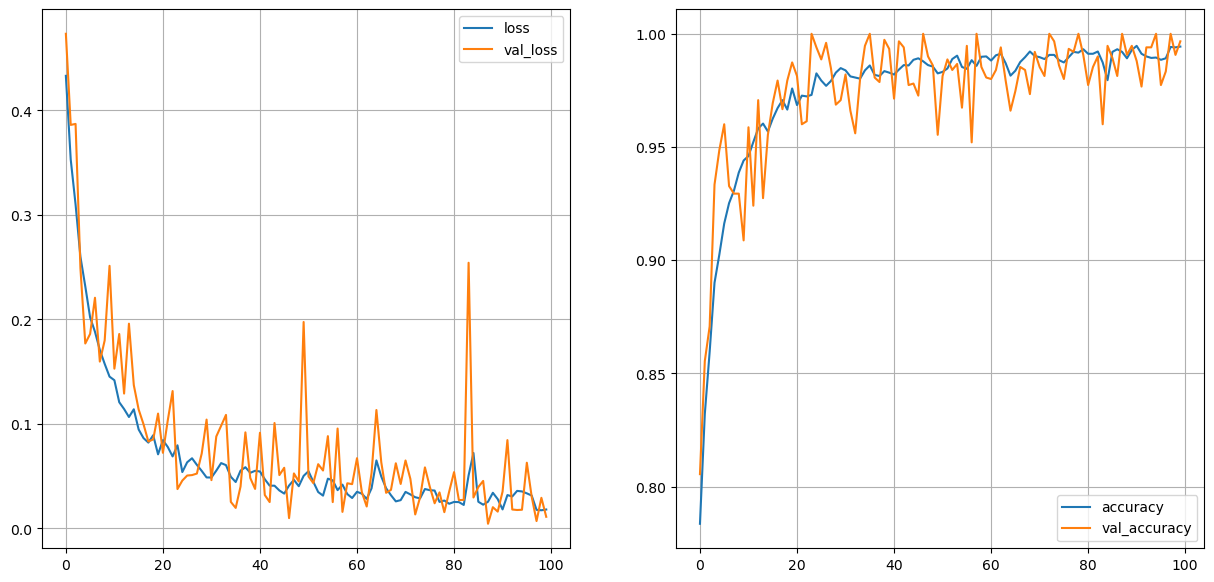

number of nodes 64, dropout_probability 0 , Learning rate 0.005 , batch size 32
31/31 [==============================] - 0s 2ms/step - loss: 147.0953 - accuracy: 0.6925


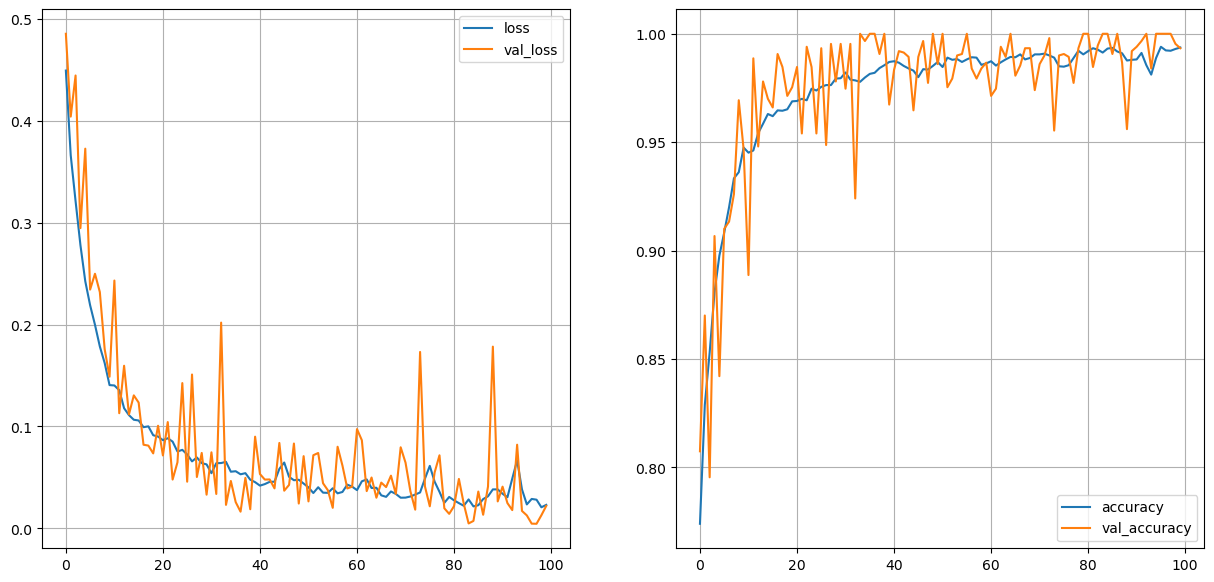

number of nodes 64, dropout_probability 0 , Learning rate 0.005 , batch size 64
31/31 [==============================] - 0s 2ms/step - loss: 103.1935 - accuracy: 0.3646


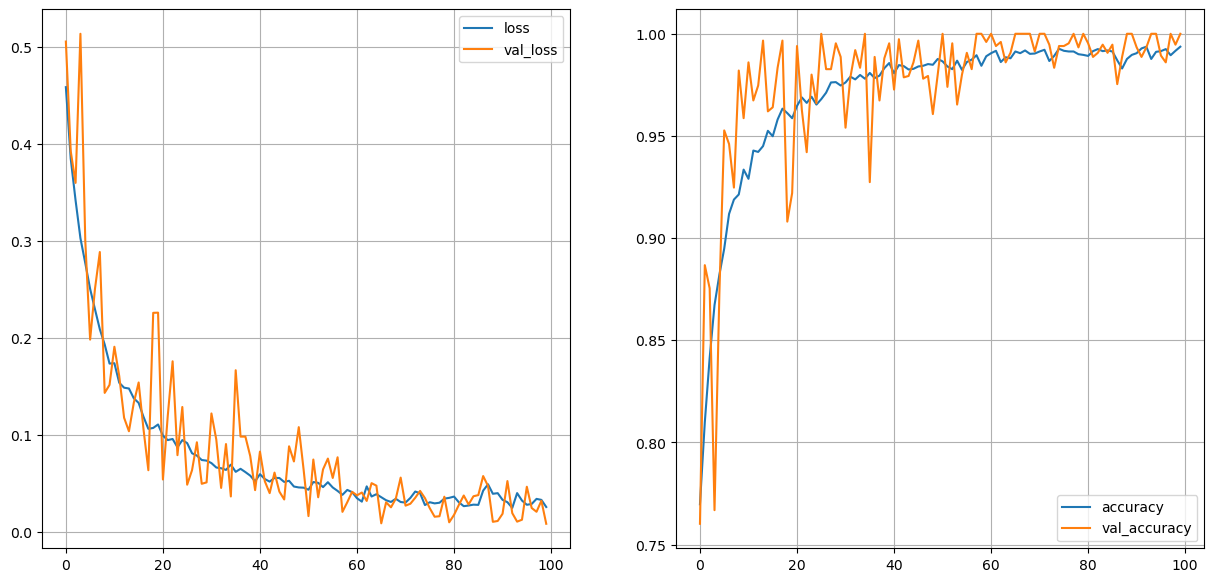

number of nodes 64, dropout_probability 0 , Learning rate 0.005 , batch size 128
31/31 [==============================] - 0s 2ms/step - loss: 10.9023 - accuracy: 0.9664


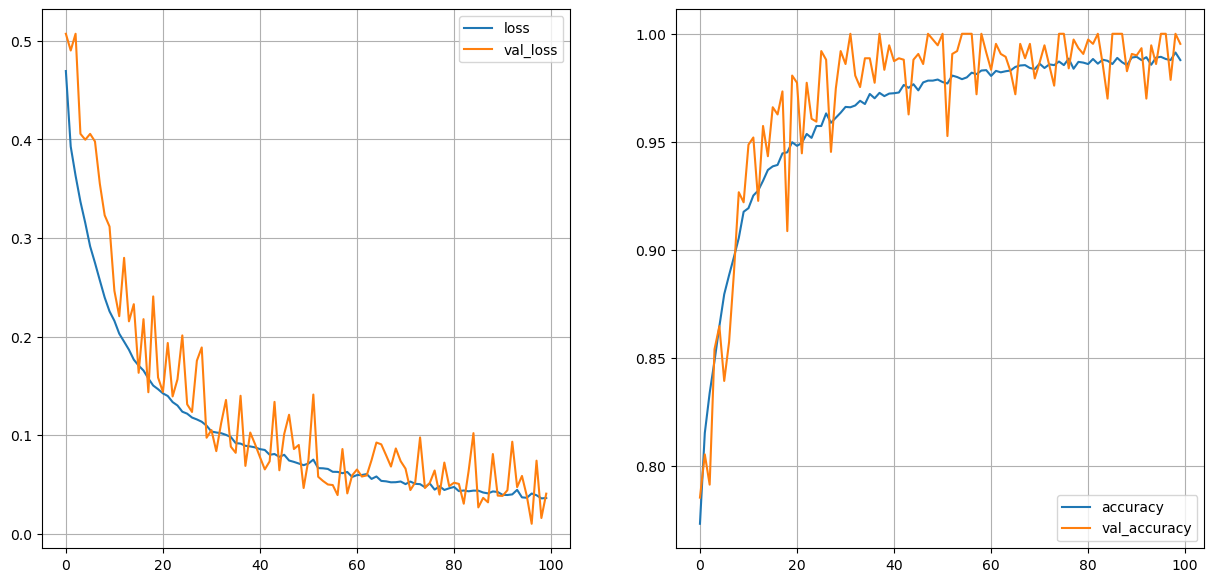

number of nodes 64, dropout_probability 0 , Learning rate 0.001 , batch size 32
31/31 [==============================] - 0s 1ms/step - loss: 10.4457 - accuracy: 0.8330


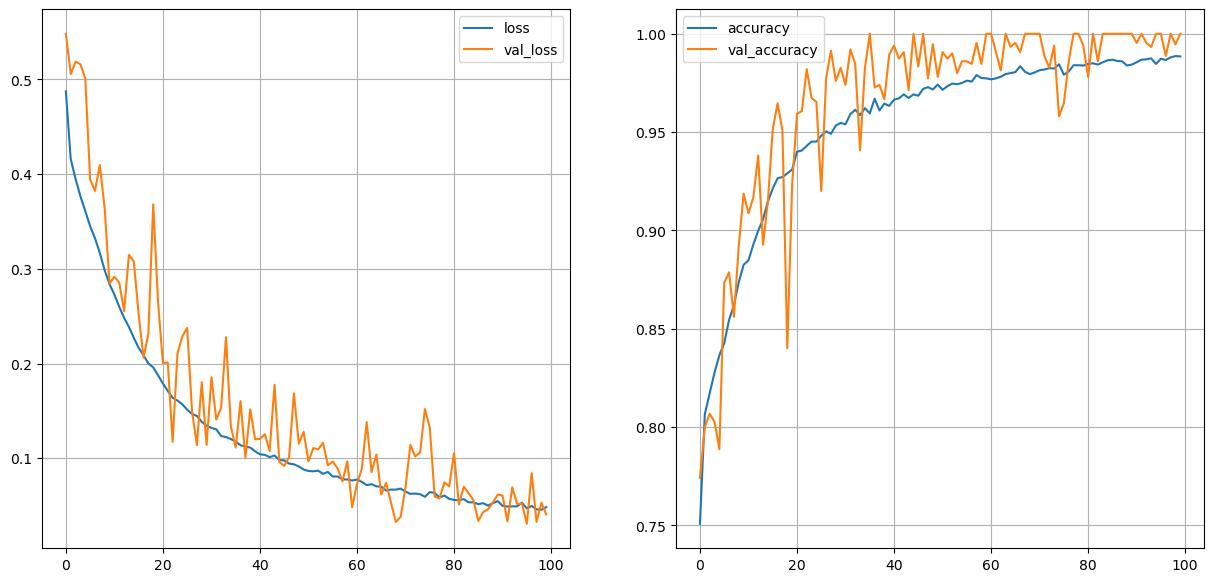

number of nodes 64, dropout_probability 0 , Learning rate 0.001 , batch size 64
31/31 [==============================] - 0s 3ms/step - loss: 30.9484 - accuracy: 0.4939


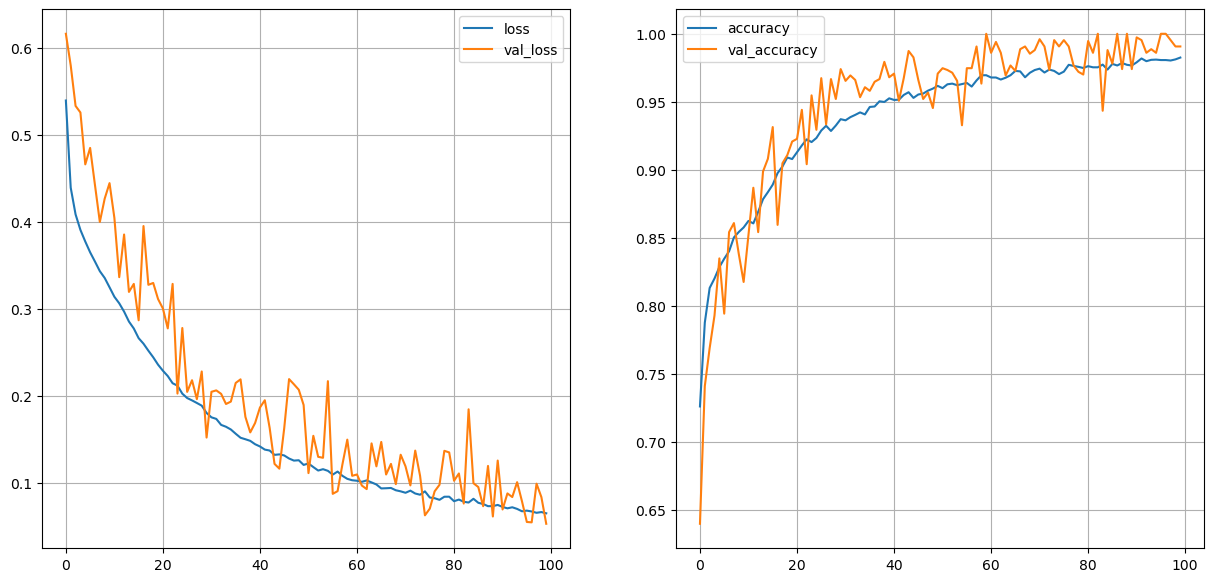

number of nodes 64, dropout_probability 0 , Learning rate 0.001 , batch size 128
31/31 [==============================] - 0s 2ms/step - loss: 32.6339 - accuracy: 0.6354


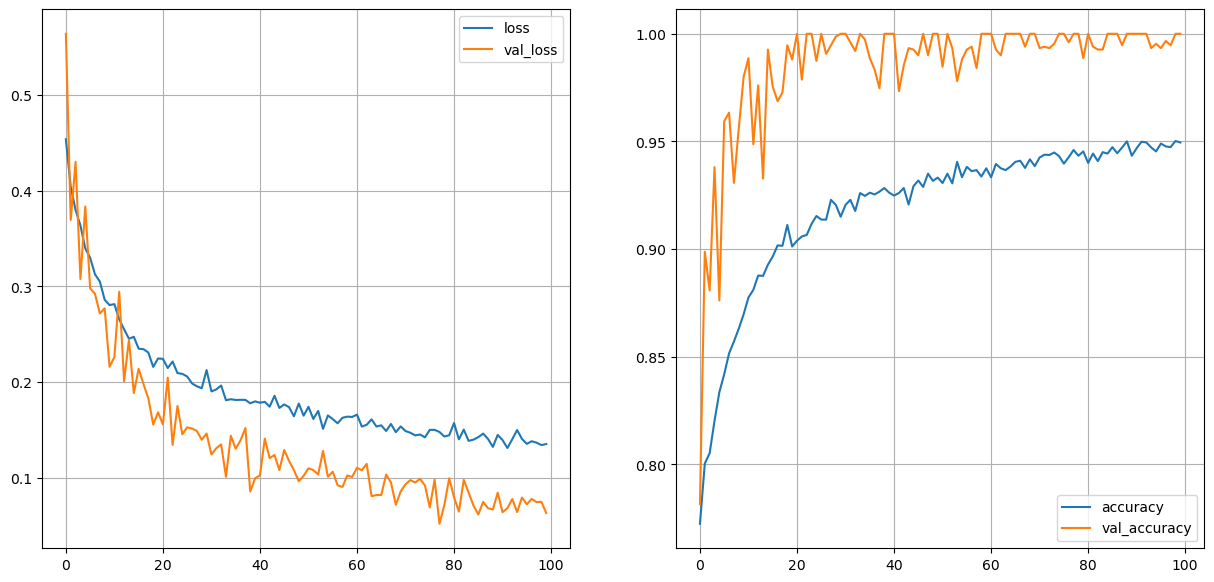

number of nodes 64, dropout_probability 0.2 , Learning rate 0.01 , batch size 32
31/31 [==============================] - 0s 1ms/step - loss: 9.0432 - accuracy: 0.6690


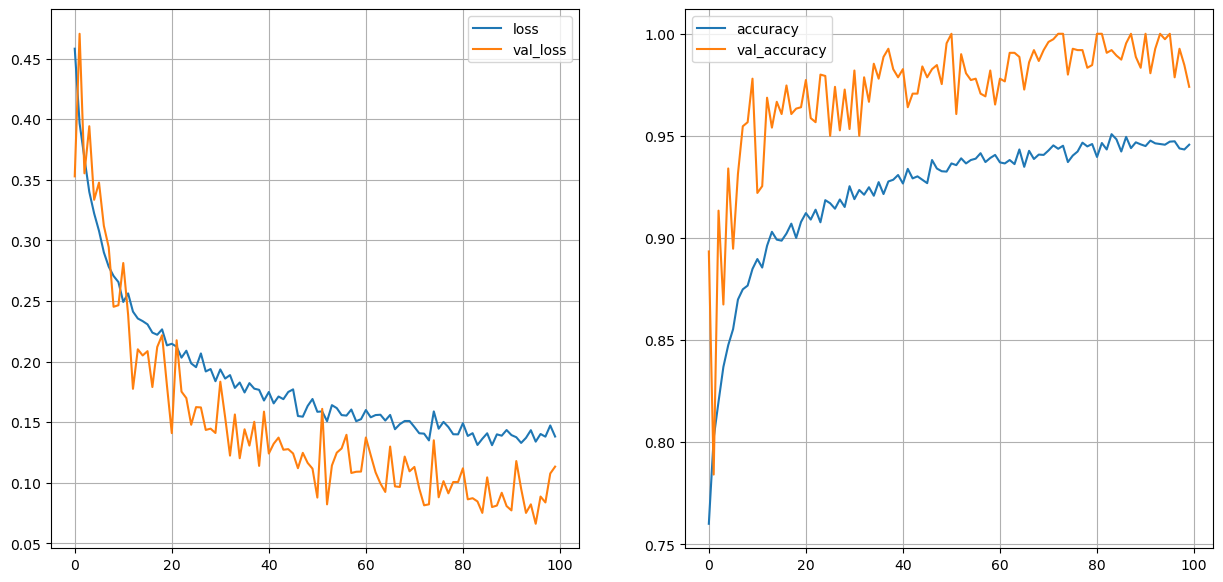

number of nodes 64, dropout_probability 0.2 , Learning rate 0.01 , batch size 64
31/31 [==============================] - 0s 1ms/step - loss: 11.8889 - accuracy: 0.6731


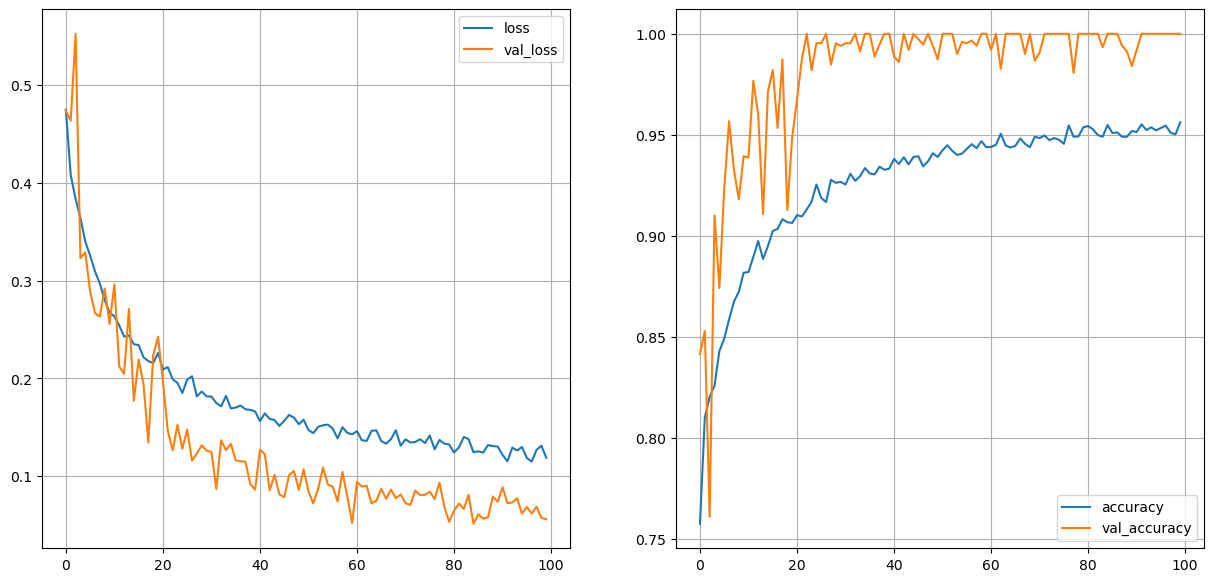

number of nodes 64, dropout_probability 0.2 , Learning rate 0.01 , batch size 128
31/31 [==============================] - 0s 2ms/step - loss: 7.7051 - accuracy: 0.8248


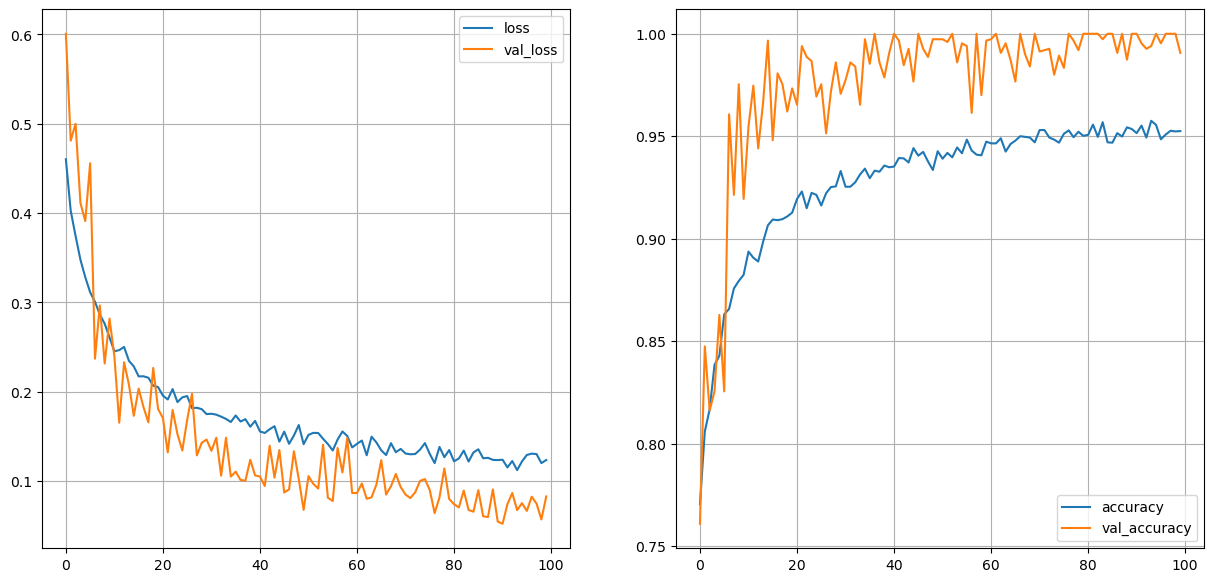

number of nodes 64, dropout_probability 0.2 , Learning rate 0.005 , batch size 32
31/31 [==============================] - 0s 2ms/step - loss: 18.5151 - accuracy: 0.7332


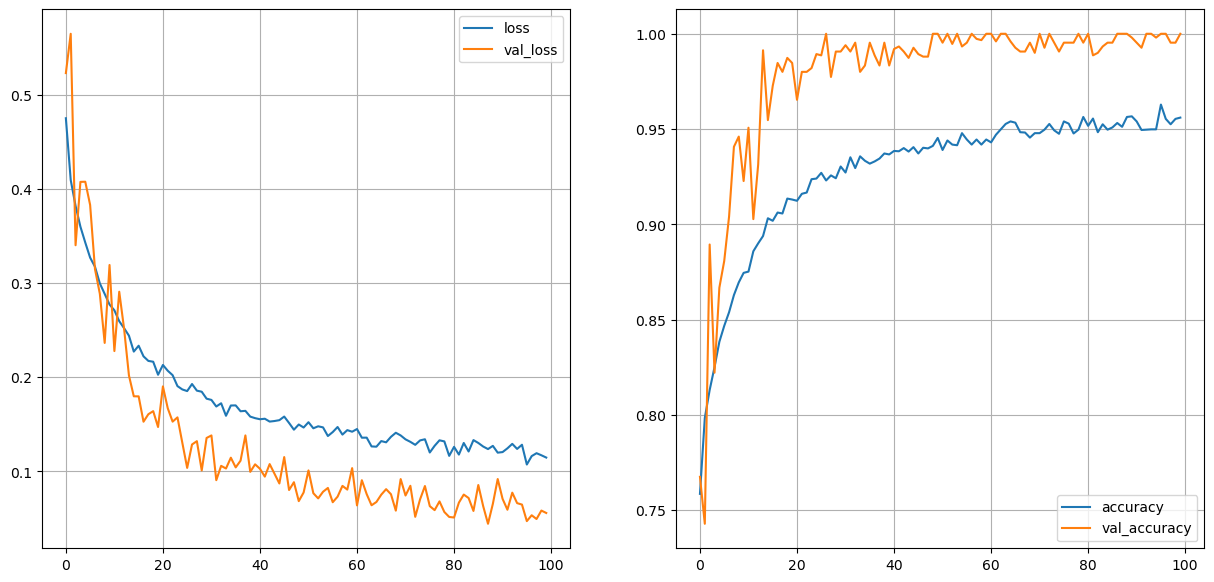

number of nodes 64, dropout_probability 0.2 , Learning rate 0.005 , batch size 64
31/31 [==============================] - 0s 1ms/step - loss: 8.8270 - accuracy: 0.9379


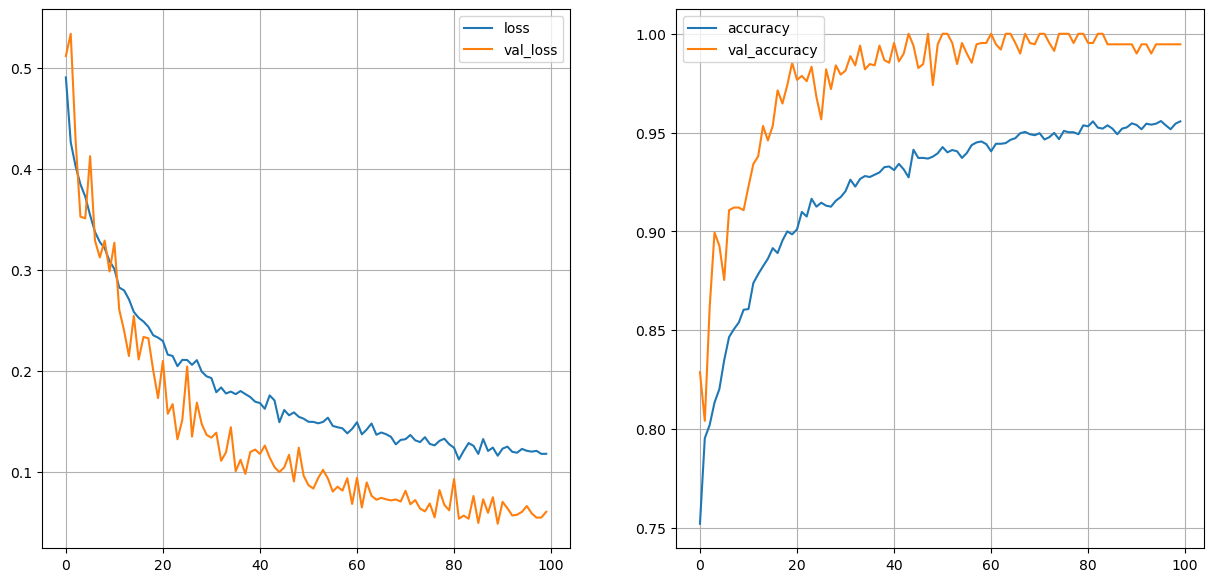

number of nodes 64, dropout_probability 0.2 , Learning rate 0.005 , batch size 128
31/31 [==============================] - 0s 2ms/step - loss: 6.8587 - accuracy: 0.9664


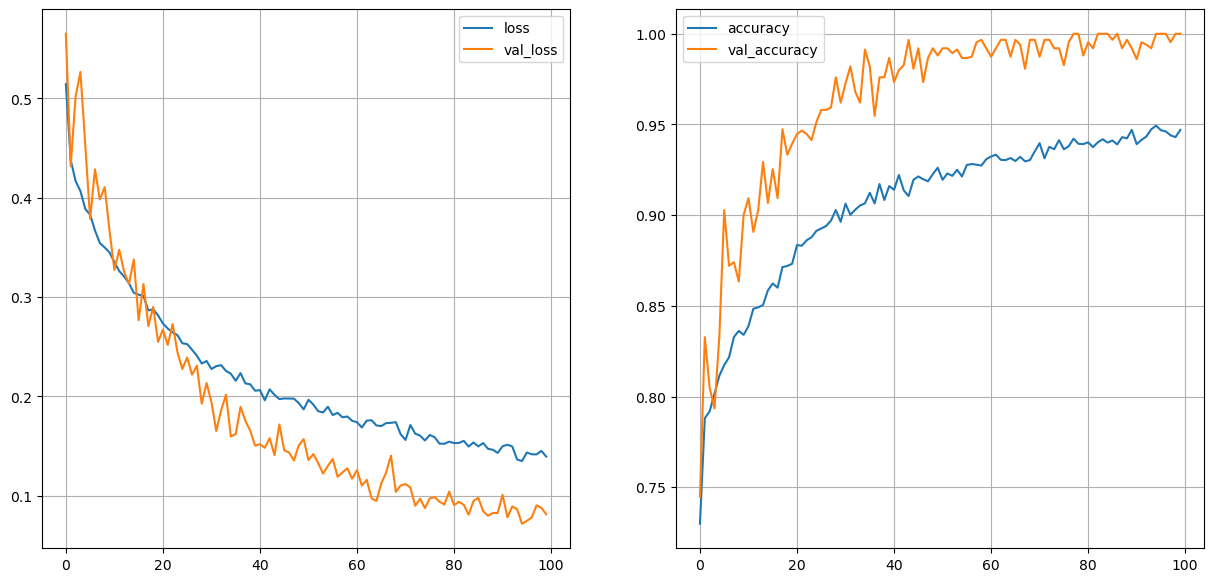

number of nodes 64, dropout_probability 0.2 , Learning rate 0.001 , batch size 32
31/31 [==============================] - 0s 2ms/step - loss: 7.0649 - accuracy: 0.5611


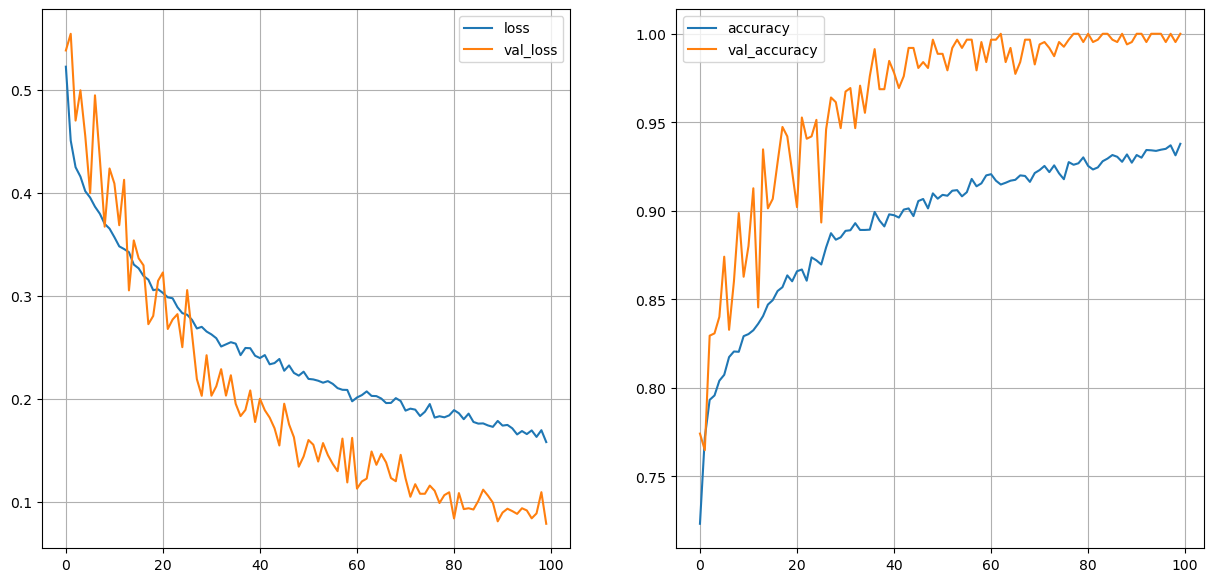

number of nodes 64, dropout_probability 0.2 , Learning rate 0.001 , batch size 64
31/31 [==============================] - 0s 2ms/step - loss: 2.9017 - accuracy: 0.8982


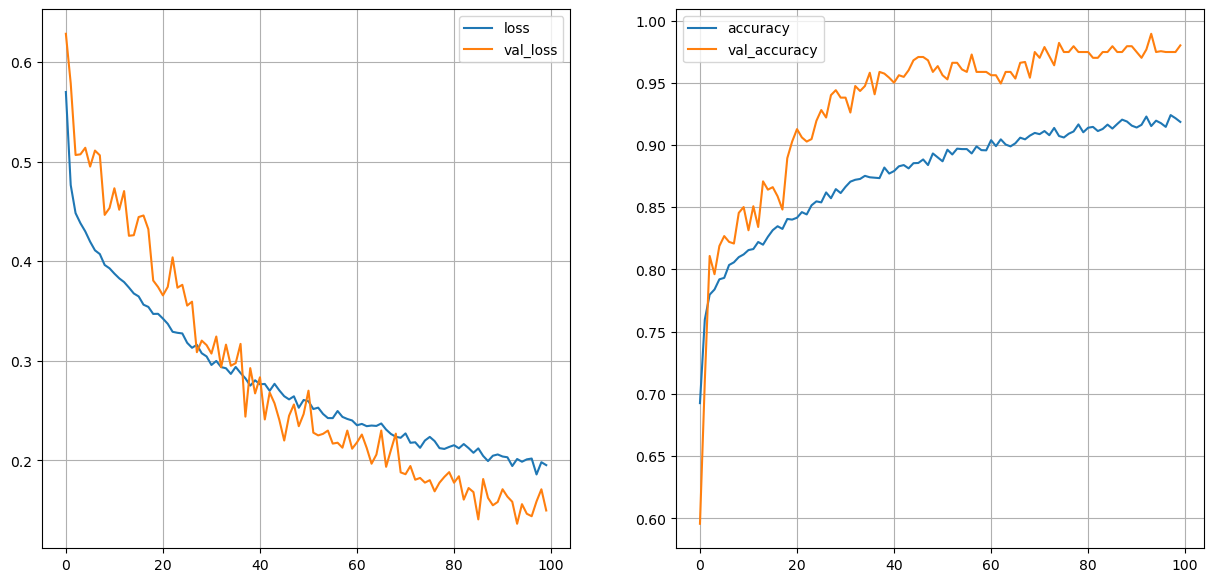

number of nodes 64, dropout_probability 0.2 , Learning rate 0.001 , batch size 128
31/31 [==============================] - 0s 2ms/step - loss: 38.1695 - accuracy: 0.4582


In [34]:
epochs = 100
least_val_loss =float('inf')
least_loss_model=None
most_effect_history=None
for num_nodes in [16,32,64] : 
    for dropout_prob in [0, 0.2] : 
        for lr in [0.01,0.005,0.001] : 
            for batch_size in [32,64,128] : 
                model,history=train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
                plot_history(history)
                print(f'number of nodes {num_nodes}, dropout_probability {dropout_prob} , Learning rate {lr} , batch size {batch_size}')
                val_loss=model.evaluate(X_test, y_test)[0]
                if val_loss < least_val_loss:
                    least_val_loss= val_loss
                    least_loss_model=model
                    most_effect_history=history



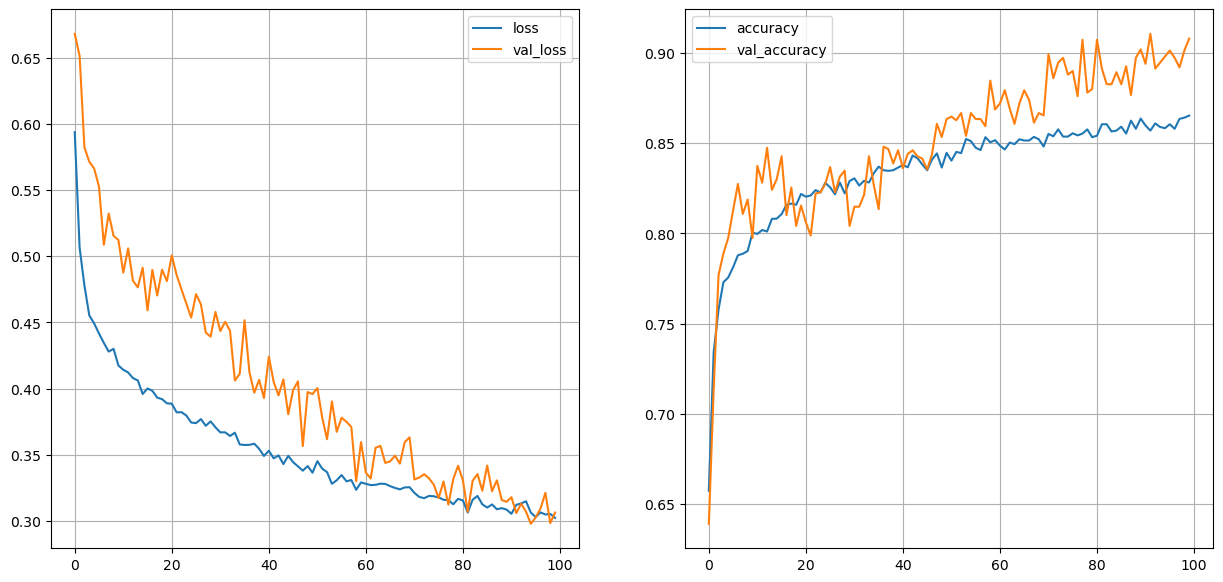

In [35]:
plot_history(most_effect_history)

In [36]:
y_pred=least_loss_model.predict(X_test) #output is with sigmoid =>  [0,1]
y_pred =(y_pred> 0.5).astype(int).reshape(-1)
y_pred

31/31 [==============================] - 0s 2ms/step


array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.89       949
           1       0.05      0.27      0.08        33

    accuracy                           0.80       982
   macro avg       0.51      0.54      0.48       982
weighted avg       0.94      0.80      0.86       982



In [51]:
#Module Extraction 
import joblib

In [52]:
joblib.dump(least_loss_model,'Stroke_prediction.joblib')

['Stroke_prediction.joblib']